In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
import json
import re
import numpy as np
from pathlib import Path
path = Path('data/')
lang_code = "is"
with open(path/f"MaCoCu-{lang_code}-en.json", "r") as file:
    tus_content = json.load(file)

# Convert data to a dataframe
corpus_df = pd.DataFrame(tus_content)

print("Dataframe loaded. Initial number of sentences: {}".format(corpus_df.en_source.count()))
# Sort by english url and then by en_par_id to order the paragraphs into texts
corpus_df = corpus_df.sort_values(by = ["en_source", "en_par_id"])

# Add information about domains
domain_re=re.compile(r'^https?://(?:www\.)?(.+?)[/$]')

en_domain_list = [domain_re.search(i).group(1) for i in corpus_df.en_source.to_list()]

corpus_df["en_domain"] = en_domain_list

# Repeat with domain of the other language
sl_domain_list = [domain_re.search(i).group(1) for i in corpus_df[f"{lang_code}_source"].to_list()]
corpus_df[f"{lang_code}_domain"] = sl_domain_list

# Add information whether the domains are the same
corpus_df["same_domains"] = np.where(corpus_df["en_domain"] == corpus_df[f"{lang_code}_domain"], "yes", 'no')
print("Added same domains column.")


Dataframe loaded. Initial number of sentences: 267365
Added same domains column.


In [25]:
corpus_df.columns

Index(['score_bicleaner_ai', 'translation_direction', 'en_source', 'en_par_id',
       'en_par', 'en_var_doc', 'en_var_dom', 'is_source', 'is_par_id',
       'is_par', 'en_domain', 'is_domain', 'same_domains'],
      dtype='object')

In [30]:
corpus_df[corpus_df['same_domains']=='no'][['en_par', 'en_domain', 'en_source', 'is_par', 'is_domain', 'is_source']]


                                                   en_par          en_domain  \
66519   This website uses cookies to improve your expe...    1001arabian.net   
201544  rather, it resides first in the imputation of ...     aaargh.vho.org   
233481  Jóhanna Gísladóttir GK with 100 tonn in one tr...    aflafrettir.com   
159593  Gillnet boat up to 20 in juny.nr.1 list number 1.    aflafrettir.com   
113962                       Trawlers in Norway list nr 4    aflafrettir.com   
...                                                   ...                ...   
57714   To them Deception came at the time of decision...   zarathushtra.com   
196032                                        "That's it?   zarathushtra.com   
141538  This Website uses cookies to improve the user ...  www2.deloitte.com   
162670  Please see our cookie settings link at the top...  www2.deloitte.com   
43654   Personal data may be shared with government au...          yamaha.is   

                                       

In [35]:
comp = pd.read_csv('data/en-is/MaCoCu.en-is.doc_complete.tsv', sep='\t', header=0)

In [38]:
comp.groupby('set')['score_bicleaner_ai'].describe()

,count,mean,std,min,25%,50%,75%,max
set,,,,,,,,
dev,559.0,0.821839,0.140414,0.5,0.715,0.8620,0.9495,0.997
test,492.0,0.832612,0.141089,0.5,0.732,0.8775,0.9540,0.999
train,16234.0,0.836067,0.139760,0.5,0.740,0.8840,0.9540,1.000


In [43]:
comp.groupby('set')['translation_direction'].value_counts()/comp.groupby('set')['translation_direction'].count()

set    translation_direction
dev    first-orig-second-ht     0.538462
       second-orig-first-ht     0.223614
       second-orig-first-mt     0.130590
       first-orig-second-mt     0.107335
test   first-orig-second-ht     0.512195
       second-orig-first-ht     0.245935
       first-orig-second-mt     0.123984
       second-orig-first-mt     0.117886
train  first-orig-second-ht     0.577738
       second-orig-first-ht     0.195824
       first-orig-second-mt     0.113958
       second-orig-first-mt     0.112480
dtype: float64

# Analysing the preprocessed corpus

<Figure size 640x480 with 0 Axes>

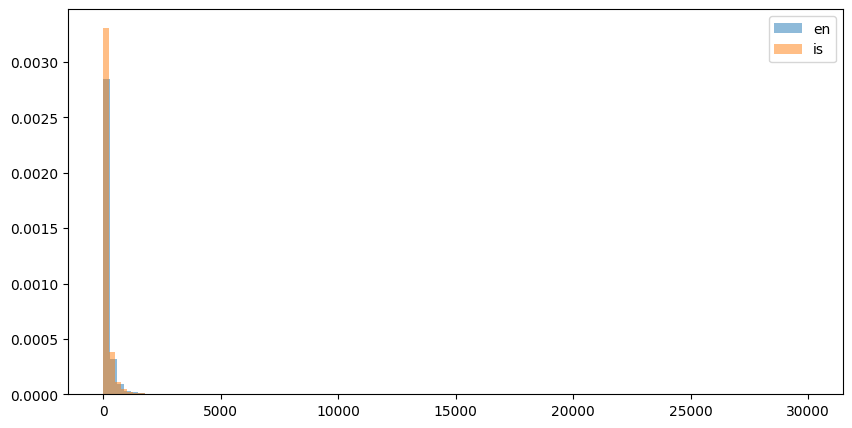

<Figure size 640x480 with 0 Axes>

In [49]:
data = pd.read_csv("data/preprocessed_is.csv", sep="\t", header=0)
# density plot of the length of the docs
plt.figure(figsize=(10, 5))
plt.hist(data.en_length, bins=100, density=True, alpha=0.5, label='en')
plt.hist(data.is_length, bins=100, density=True, alpha=0.5, label='is')
plt.legend(loc='upper right')
plt.figure()

In [50]:
data[data['en_length']<500].shape[0]/data.shape[0]

0.9291139240506329

<Figure size 640x480 with 0 Axes>

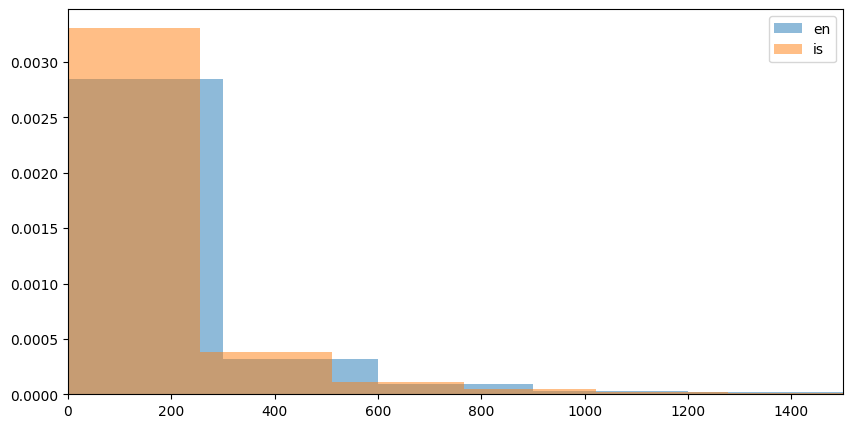

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(10, 5))
plt.xlim(0,1500)
plt.hist(data.en_length, bins=100, density=True, alpha=0.5, label='en')
plt.hist(data.is_length, bins=100, density=True, alpha=0.5, label='is')
plt.legend(loc='upper right')
plt.figure()

In [51]:
data[(data['en_length']<75)].shape[0]/data.shape[0]

0.493342709798406

In [57]:
data[(data['en_length']<50)].shape[0]/data.shape[0]

0.37491795593061417

In [35]:
data[(data['en_length']<25)].shape[0]/data.shape[0]

0.18968588842006565

In [33]:
data[(data['en_length']<=1000) & (data['en_length']>=25)].shape[0]/data.shape[0]

0.7901078293483357

# Comapring labels for docs with different min lengths [sample]

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
label_50 = pd.read_csv("data/sample_50_labelled.csv", sep="\t", header=0)
label_75 = pd.read_csv("data/sample_75_labelled.csv", sep="\t", header=0)
label_150 = pd.read_csv("data/sample_150_labelled.csv", sep="\t", header=0)
label_25 = pd.read_csv("data/sample_25_labelled.csv", sep="\t", header=0)

In [21]:
# com{tgt_col}e label distributions of labelled samples
label_150['X-GENRE'].value_counts()

X-GENRE
Information/Explanation    148
News                       134
Instruction                 73
Promotion                   49
Opinion/Argumentation       43
Legal                       35
Other                        9
Prose/Lyrical                7
Forum                        2
Name: count, dtype: int64

In [15]:
label_75['X-GENRE'].value_counts()

<bound method NDFrame._add_numeric_operations.<locals>.sum of X-GENRE
Information/Explanation    171
News                       118
Instruction                 58
Promotion                   56
Opinion/Argumentation       43
Legal                       33
Other                       11
Prose/Lyrical                9
Forum                        1
Name: count, dtype: int64>

In [47]:
label_50['X-GENRE'].value_counts()

X-GENRE
Information/Explanation    168
News                       116
Promotion                   62
Instruction                 58
Opinion/Argumentation       38
Legal                       35
Prose/Lyrical               11
Other                        9
Forum                        3
Name: count, dtype: int64

In [48]:
label_25['X-GENRE'].value_counts()

X-GENRE
Information/Explanation    187
News                       103
Promotion                   62
Instruction                 62
Legal                       34
Opinion/Argumentation       31
Prose/Lyrical               13
Other                        6
Forum                        2
Name: count, dtype: int64

In [22]:
all_labels = label_25
# rename the column
all_labels = all_labels.rename(columns={"X-GENRE": "X-GENRE-25"})
all_labels['X-GENRE-50']=label_50['X-GENRE']
all_labels['X-GENRE-75']=label_75['X-GENRE']
all_labels['X-GENRE-150']=label_150['X-GENRE']

# change to string X-GENRE-25
all_labels['X-GENRE-25'] = all_labels['X-GENRE-25'].astype(str)
all_labels['X-GENRE-50'] = all_labels['X-GENRE-50'].astype(str)
all_labels['X-GENRE-75'] = all_labels['X-GENRE-75'].astype(str)
all_labels['X-GENRE-150'] = all_labels['X-GENRE-150'].astype(str)

In [23]:
# remove forum and other labels 
all_labels = all_labels[~all_labels['X-GENRE-25'].str.contains('Forum')]
all_labels = all_labels[~all_labels['X-GENRE-50'].str.contains('Forum')]
all_labels = all_labels[~all_labels['X-GENRE-75'].str.contains('Forum')]
all_labels = all_labels[~all_labels['X-GENRE-150'].str.contains('Forum')]
all_labels = all_labels[~all_labels['X-GENRE-25'].str.contains('Other')]
all_labels = all_labels[~all_labels['X-GENRE-50'].str.contains('Other')]
all_labels = all_labels[~all_labels['X-GENRE-75'].str.contains('Other')]
all_labels = all_labels[~all_labels['X-GENRE-150'].str.contains('Other')]
all_labels = all_labels[~all_labels['X-GENRE-25'].str.contains('Prose/Lyrical')]
all_labels = all_labels[~all_labels['X-GENRE-50'].str.contains('Prose/Lyrical')]
all_labels = all_labels[~all_labels['X-GENRE-75'].str.contains('Prose/Lyrical')]
all_labels = all_labels[~all_labels['X-GENRE-150'].str.contains('Prose/Lyrical')]

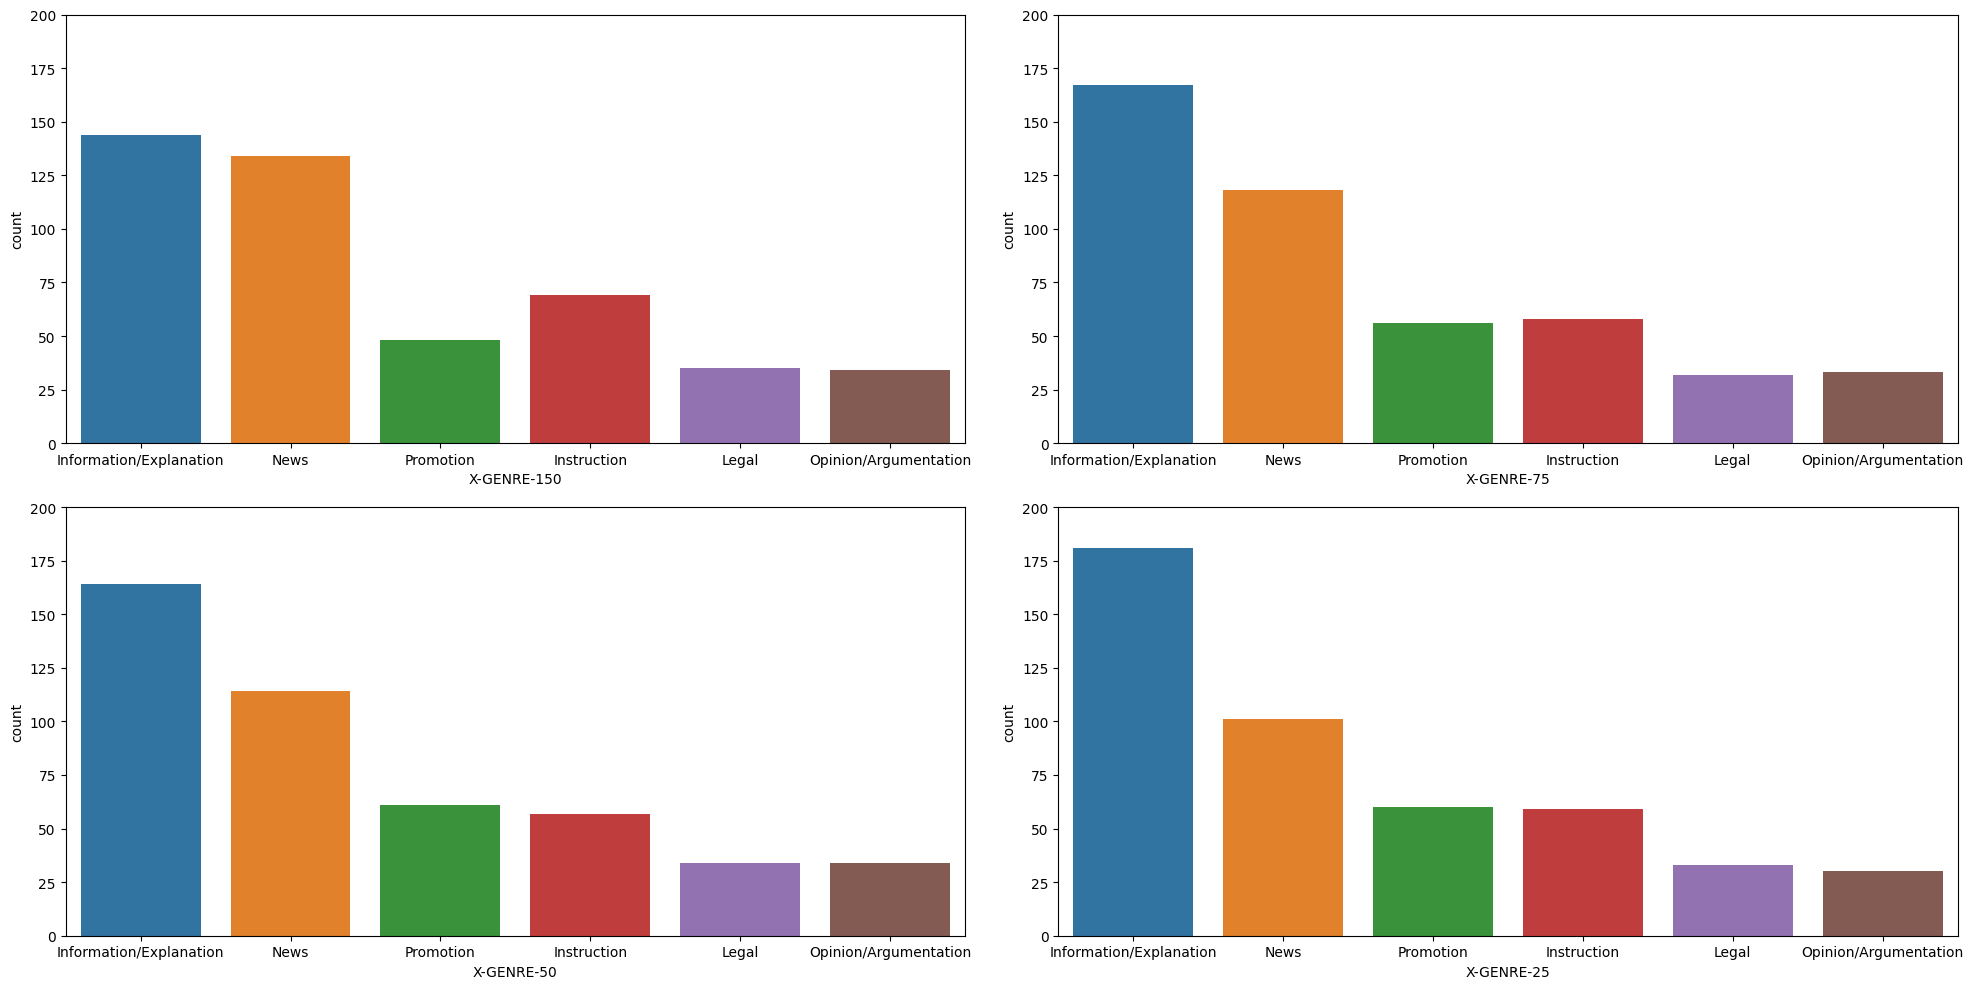

In [26]:
# plot distribution of X-GENRE-25
labels = all_labels["X-GENRE-25"].unique().tolist()

plt.figure(figsize=(20,10))

#make 4 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE-150", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE-75", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.subplot(2,2,3)
sns.countplot(x="X-GENRE-50", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.subplot(2,2,4)
sns.countplot(x="X-GENRE-25", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.tight_layout()
plt.show()

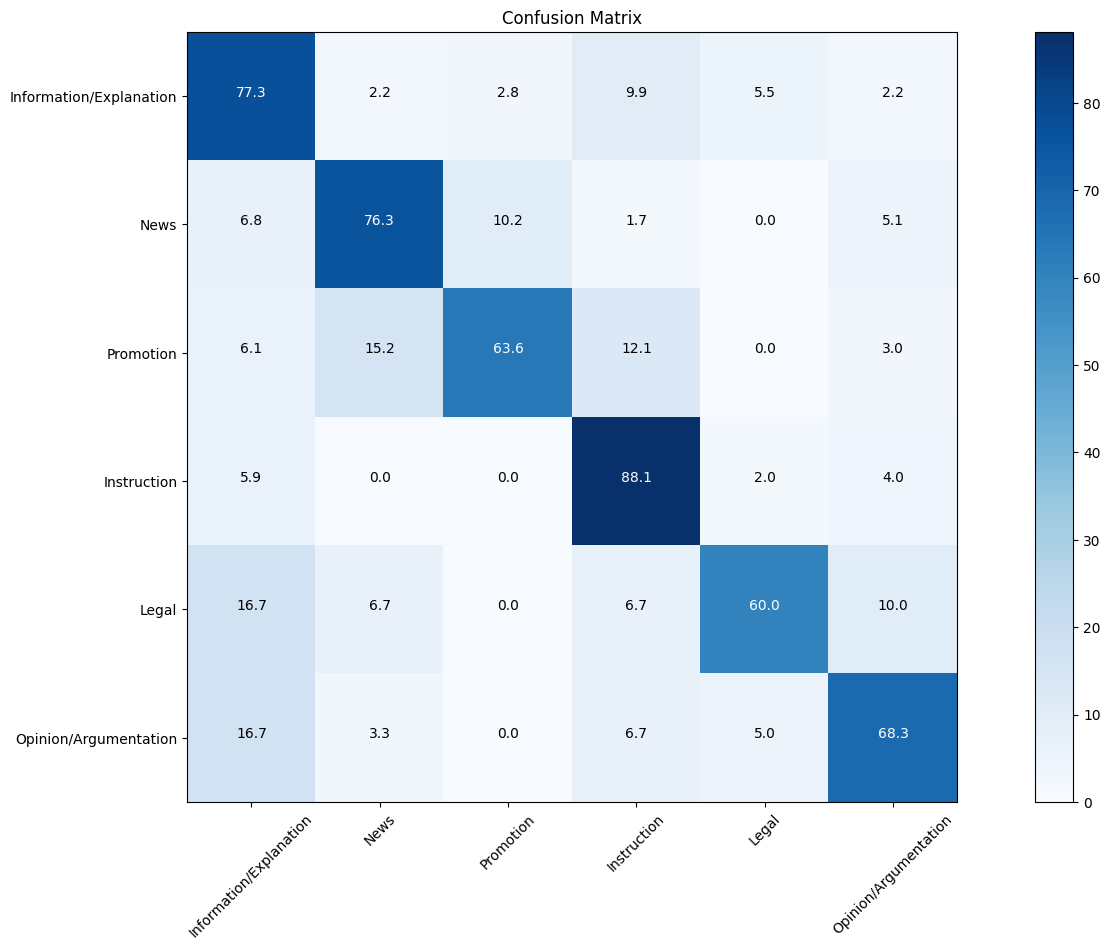

In [28]:
# plot a confusion matrix between the X-GENRE-25 and X-GENRE-75
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# confusion matrix
cm = confusion_matrix(all_labels['X-GENRE-25'], all_labels['X-GENRE-75'])
# normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# percentage confusion matrix
cm = cm*100
# round to 2 decimals
cm = np.round(cm, decimals=1)
#plot confusion matrix
plt.figure(figsize=(20,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
# label the cells
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),
    horizontalalignment="center", 
    color="white" if cm[i, j] > thresh else "black")




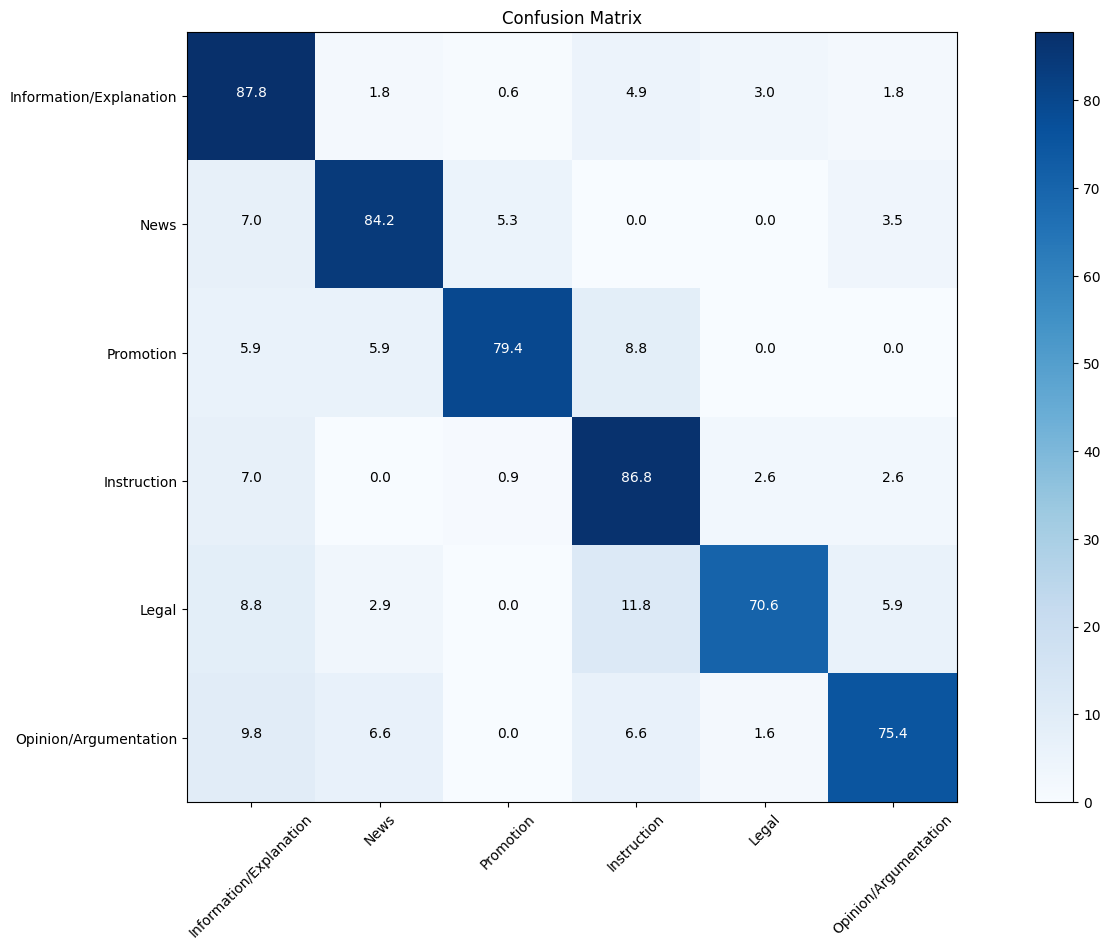

In [40]:
# plot a confusion matrix between the X-GENRE-25 and X-GENRE-75
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# confusion matrix
cm = confusion_matrix(all_labels['X-GENRE-50'], all_labels['X-GENRE-75'])
# normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# percentage confusion matrix
cm = cm*100
# round to 2 decimals
cm = np.round(cm, decimals=1)
#plot confusion matrix
plt.figure(figsize=(20,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
# label the cells
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),
    horizontalalignment="center", 
    color="white" if cm[i, j] > thresh else "black")


In [91]:
all_labels['label_agreement'] = all_labels.apply(lambda x: 1 if x['X-GENRE-25'] == x['X-GENRE-50'] == x['X-GENRE-75'] == x['X-GENRE-150'] else 0, axis=1)
all_labels['over_50_agree'] =  all_labels.apply(lambda x: 1 if x['X-GENRE-50'] == x['X-GENRE-75'] == x['X-GENRE-150'] else 0, axis=1)
all_labels['over_75_agree'] =  all_labels.apply(lambda x: 1 if x['X-GENRE-75'] == x['X-GENRE-150'] else 0, axis=1)
all_labels['no_agreement'] = all_labels.apply(lambda x: 1 if x['X-GENRE-25'] != x['X-GENRE-50'] != x['X-GENRE-75'] != x['X-GENRE-150'] else 0, axis=1)

In [8]:
# compute % of agreement between X-GENRE-75 and the other labels
all_labels['25_75_agree'] = all_labels.apply(lambda x: 1 if x['X-GENRE-25'] == x['X-GENRE-75'] else 0, axis=1)
all_labels['50_75_agree'] = all_labels.apply(lambda x: 1 if x['X-GENRE-50'] == x['X-GENRE-75'] else 0, axis=1)
all_labels['150_75_agree'] = all_labels.apply(lambda x: 1 if x['X-GENRE-75'] == x['X-GENRE-150'] else 0, axis=1)

print("Agreement between X-GENRE-75 and X-GENRE-25: ", all_labels['25_75_agree'].sum()/all_labels.shape[0])
print("Agreement between X-GENRE-75 and X-GENRE-50: ", all_labels['50_75_agree'].sum()/all_labels.shape[0])
print("Agreement between X-GENRE-75 and X-GENRE-150: ", all_labels['150_75_agree'].sum()/all_labels.shape[0])

Agreement between X-GENRE-75 and X-GENRE-25:  0.734
Agreement between X-GENRE-75 and X-GENRE-50:  0.82
Agreement between X-GENRE-75 and X-GENRE-150:  0.802


In [11]:
# check which label combinations do not agree
all_labels[all_labels['25_75_agree']==0][['X-GENRE-75','X-GENRE-25']].value_counts()

X-GENRE-75               X-GENRE-25             
News                     Information/Explanation    18
Opinion/Argumentation    Information/Explanation    11
Information/Explanation  Promotion                  10
                         News                        6
Legal                    Instruction                 6
Information/Explanation  Opinion/Argumentation       5
Opinion/Argumentation    Prose/Lyrical               5
Instruction              Legal                       5
Legal                    Information/Explanation     5
Promotion                News                        4
                         Information/Explanation     4
News                     Promotion                   4
                         Legal                       4
Information/Explanation  Instruction                 4
Instruction              Information/Explanation     4
Opinion/Argumentation    Promotion                   3
                         News                        3
Promotion       

In [52]:
all_labels.label_agreement.value_counts()

label_agreement
1    298
0    202
Name: count, dtype: int64

In [53]:
all_labels.over_50_agree.value_counts()

over_50_agree
1    351
0    149
Name: count, dtype: int64

In [54]:
all_labels.over_75_agree.value_counts()

over_75_agree
1    401
0     99
Name: count, dtype: int64

In [55]:
all_labels.no_agreement.value_counts()

no_agreement
0    481
1     19
Name: count, dtype: int64

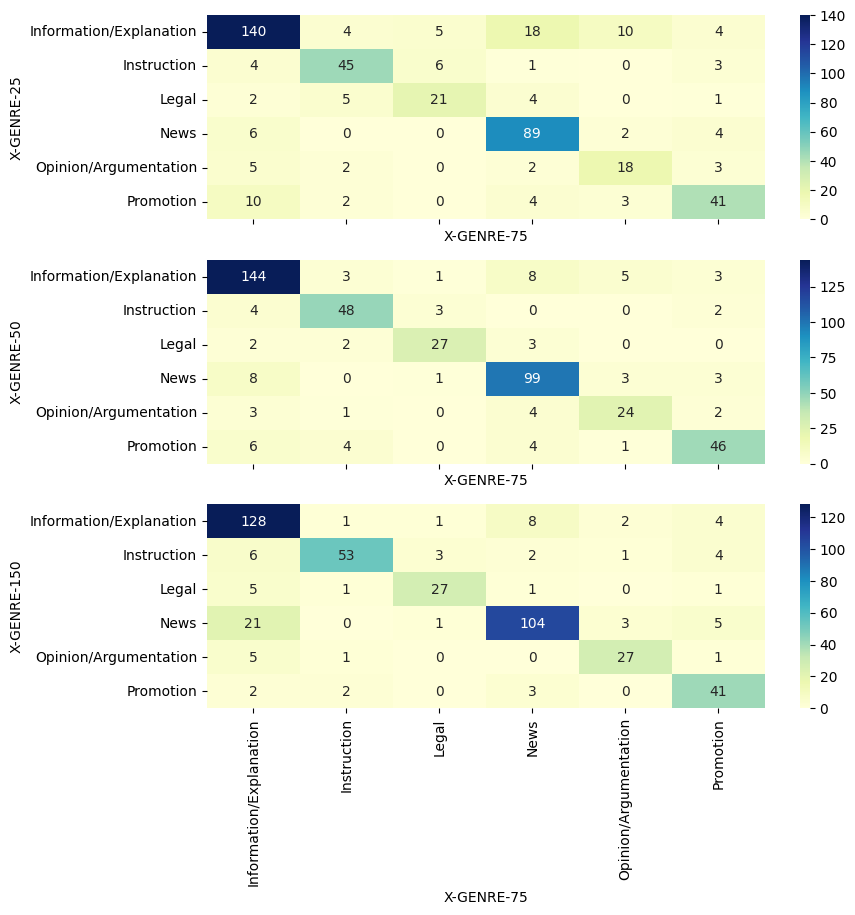

In [41]:
# make confusion matrix between all_labels['X-GENRE-25'] and all_labels['X-GENRE-75']
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(9, 9))
plt.subplot(311)

sns.heatmap(pd.crosstab(all_labels['X-GENRE-25'], all_labels['X-GENRE-75']), annot=True, cmap="YlGnBu", fmt='g')
# plt.title("Confusion matrix between X-GENRE-25 and X-GENRE-75")
# plt.xlabel("X-GENRE-75")
# plt.ylabel("X-GENRE-25")
plt.subplot(312)
sns.heatmap(pd.crosstab(all_labels['X-GENRE-50'], all_labels['X-GENRE-75']), annot=True, cmap="YlGnBu", fmt='g')
# plt.title("Confusion matrix between X-GENRE-50 and X-GENRE-75")
# plt.xlabel("X-GENRE-75")
# plt.ylabel("X-GENRE-50")
plt.subplot(313)
sns.heatmap(pd.crosstab(all_labels['X-GENRE-150'], all_labels['X-GENRE-75']), annot=True, cmap="YlGnBu", fmt='g')
# plt.title("Confusion matrix between X-GENRE-150 and X-GENRE-75")
# plt.xlabel("X-GENRE-75")
# plt.ylabel("X-GENRE-150")
# plt.tight_layout()
plt.show()

# Combine labels (doc-level) with sentence-level df + remove non-alphanumeric 

In [8]:
from src.preprocess_genre import preprocess
from pathlib import Path
preprocess(Path("data/"), "is", 1, drop_{tgt_col}_duplicates = True, drop_doc_duplicates = False, keep_columns=True, info = False)

In [161]:
doc_labels = pd.read_csv("data/labelled_25.csv", sep="\t", header=0)
data= pd.read_csv("data/Macocu-is-en-doc-format-duplicates.csv", sep="\t", header=0)
# select only docs longer than 25 (min thershold for genre classification)
data = data[data['en_length'] >= 25]
# remove all columns except en_doc and X-GENRE
doc_labels = doc_labels[["en_doc", "X-GENRE"]]
# merge doc_data and data based on en_doc
data = pd.merge(doc_labels, data, on="en_doc")
# remove Unnamed: 0 column
data = data.drop(columns=["Unnamed: 0"])
data.to_csv("data/Macocu-is-en-sent-doc-labelled.csv", sep="\t") 

In [13]:
doc_data.head()

,Unnamed: 0,en_doc,X-GENRE,score_bicleaner_ai,translation_direction,en_source,en_par_id,en_par,en_var_doc,en_var_dom,...,en_domain,is_domain,same_domains,different_domains,average_score,en-par-src-text,is_doc,en_length,is_length,length_diff
0,0,Moderators Client’s administrator can assign m...,Instruction,0.805,second-orig-first-ht,http://2way.is/,p100:107s1/1+p101:107s1/1,Moderators Client’s administrator can assign m...,A,A,...,2way.is,2way.is,yes,2way.is 2way.is,0.796414,p100:107s1/1+p101:107s1/1-http://2way.is/-Mode...,Hver viðskiptavinur hefur einn aðal-stjórnanda...,469,495,26
1,1,Moderators Client’s administrator can assign m...,Instruction,0.927,second-orig-first-ht,http://2way.is/,p102:107s1/1+p103:107s1/1,Membership management Your current member mana...,A,A,...,2way.is,2way.is,yes,2way.is 2way.is,0.796414,p102:107s1/1+p103:107s1/1-http://2way.is/-Memb...,Hver viðskiptavinur hefur einn aðal-stjórnanda...,469,495,26
2,2,Moderators Client’s administrator can assign m...,Instruction,0.859,second-orig-first-ht,http://2way.is/,p104:107s1/1+p105:107s1/1,Crunch data from reports All reports submitted...,A,A,...,2way.is,2way.is,yes,2way.is 2way.is,0.796414,p104:107s1/1+p105:107s1/1-http://2way.is/-Crun...,Hver viðskiptavinur hefur einn aðal-stjórnanda...,469,495,26
3,3,Moderators Client’s administrator can assign m...,Instruction,0.590,second-orig-first-ht,http://2way.is/,p10:107s2/2+p11:107s1/1,2Way can connect to most systems and content p...,A,A,...,2way.is,2way.is,yes,2way.is 2way.is,0.796414,p10:107s2/2+p11:107s1/1-http://2way.is/-2Way c...,Hver viðskiptavinur hefur einn aðal-stjórnanda...,469,495,26
4,4,Moderators Client’s administrator can assign m...,Instruction,0.868,second-orig-first-ht,http://2way.is/,p29:107s1/1+p30:107s1/1,Activity Feed The newest issues appear in the ...,A,A,...,2way.is,2way.is,yes,2way.is 2way.is,0.796414,p29:107s1/1+p30:107s1/1-http://2way.is/-Activi...,Hver viðskiptavinur hefur einn aðal-stjórnanda...,469,495,26


# Label Analysis [full corpus]

In [42]:
import pandas as pd
doc_data = pd.read_csv("data/Macocu-is-en-sent-doc-labelled.csv", sep="\t", header=0)
# doc_data = data.drop_duplicates(['en_doc'])

In [43]:
doc_data.columns

Index(['Unnamed: 0', 'en_doc', 'X-GENRE', 'score_bicleaner_ai',
       'translation_direction', 'en_source', 'en_par_id', 'en_par',
       'en_var_doc', 'en_var_dom', 'is_source', 'is_par_id', 'is_par',
       'en_domain', 'is_domain', 'same_domains', 'different_domains',
       'average_score', 'en-par-src-text', 'is_doc', 'en_length', 'is_length',
       'length_diff'],
      dtype='object')

In [9]:
# discard Other and Forum X-GENRE labels
doc_data = doc_data[doc_data['X-GENRE'] != 'Other']
doc_data = doc_data[doc_data['X-GENRE'] != 'Forum']
import matplotlib.pyplot as plt
import seaborn as sns

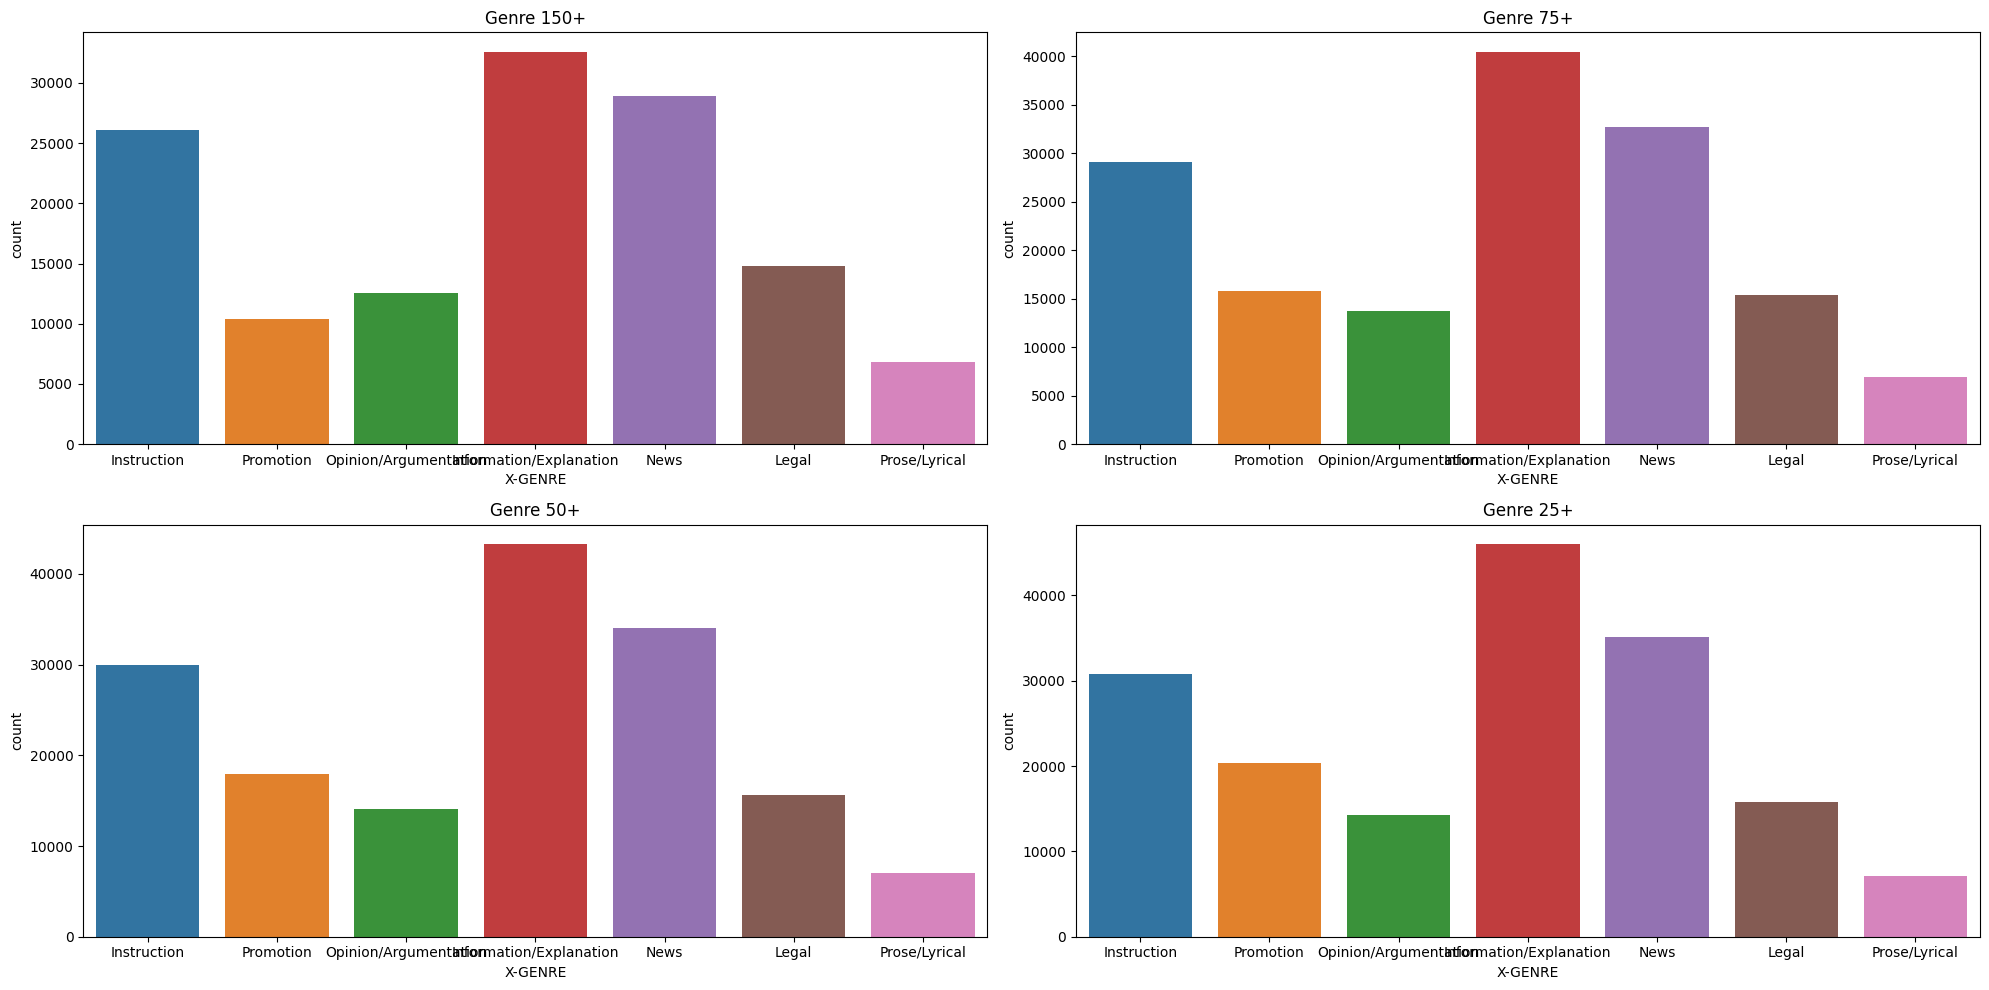

In [10]:
plt.figure(figsize=(20,10))
labels = doc_data['X-GENRE'].unique().tolist()
#make 4 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=150], order=labels)
plt.title("Genre 150+")
# plt.ylim(0, 6000)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=75], order=labels)
plt.title("Genre 75+")
# plt.ylim(0, 6000)
plt.subplot(2,2,3)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=50], order=labels)
plt.title("Genre 50+")
# plt.ylim(0, 6000)
plt.subplot(2,2,4)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=25], order=labels)
plt.title("Genre 25+")
# plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

In [45]:
# remove en_doc duplicates
data = doc_data.drop_duplicates(['en_doc'])

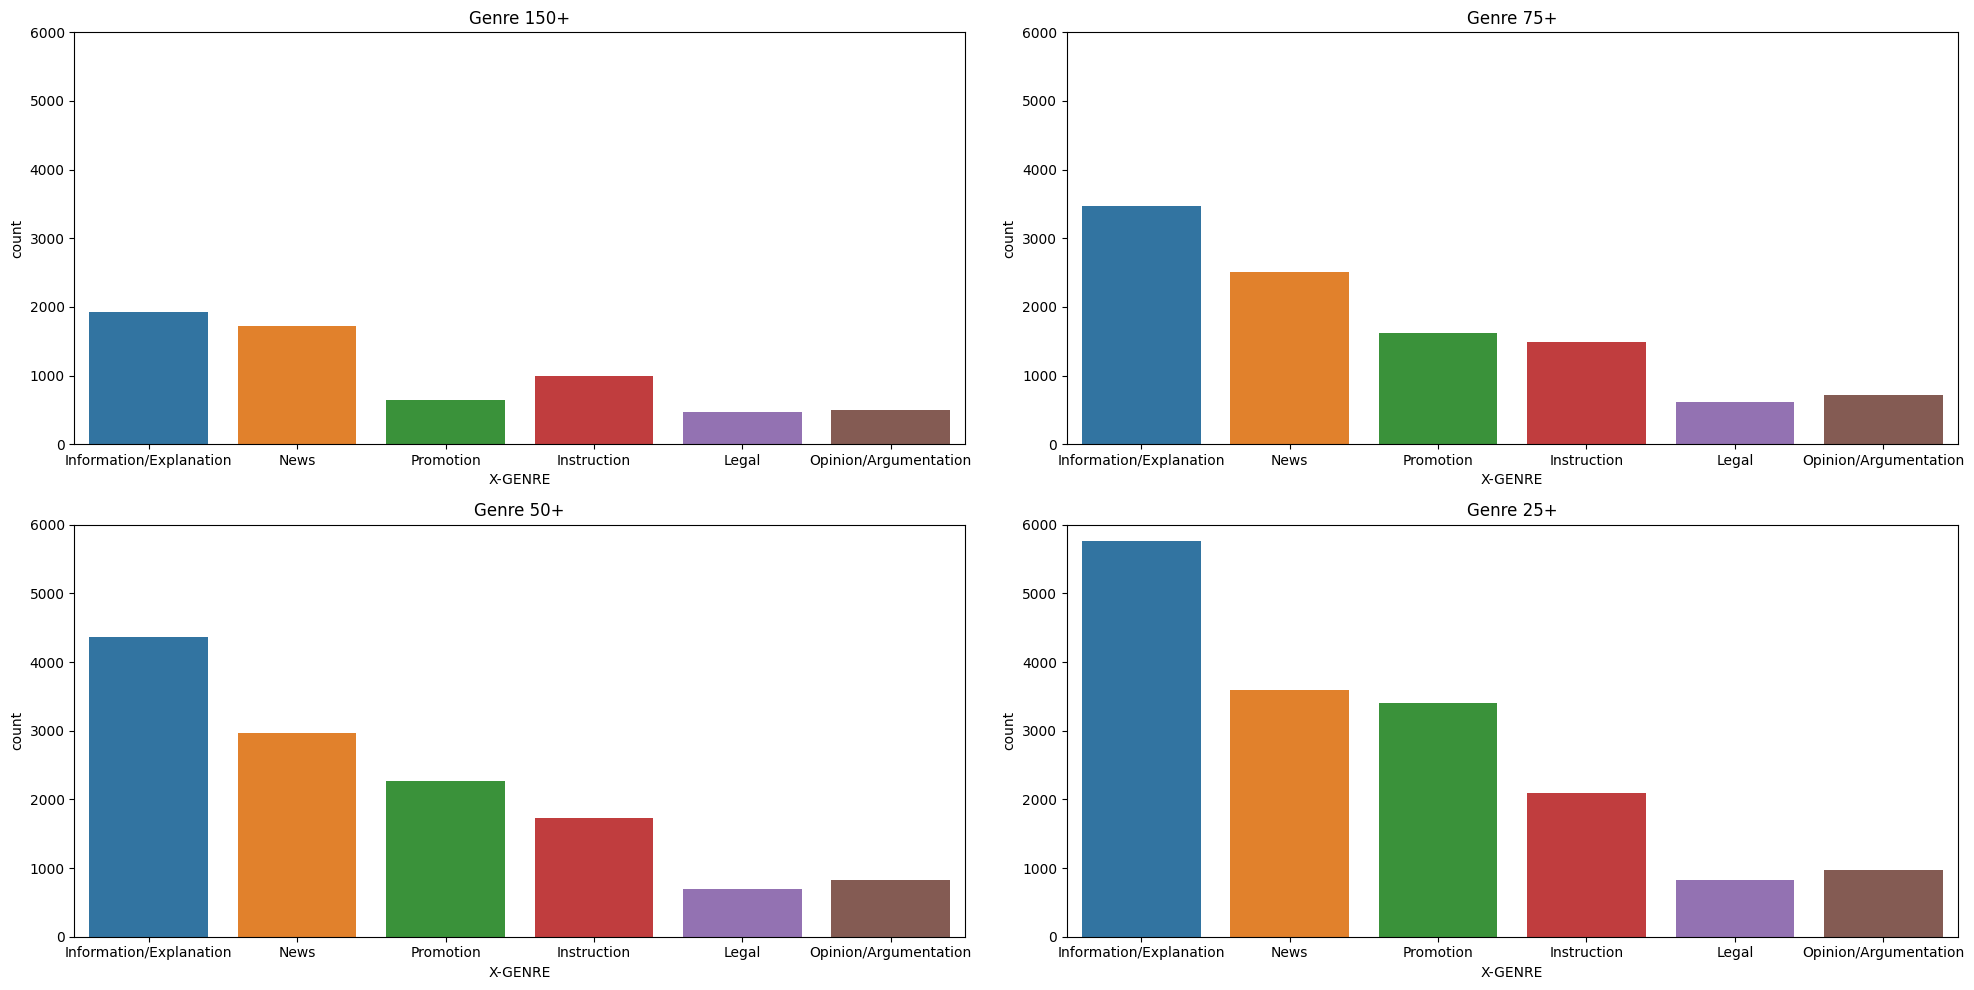

In [47]:
plt.figure(figsize=(20,10))
#make 4 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=150], order=labels)
plt.title("Genre 150+")
plt.ylim(0, 6000)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=75], order=labels)
plt.title("Genre 75+")
plt.ylim(0, 6000)
plt.subplot(2,2,3)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=50], order=labels)
plt.title("Genre 50+")
plt.ylim(0, 6000)
plt.subplot(2,2,4)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=25], order=labels)
plt.title("Genre 25+")
plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

NameError: name 'doc_data' is not defined

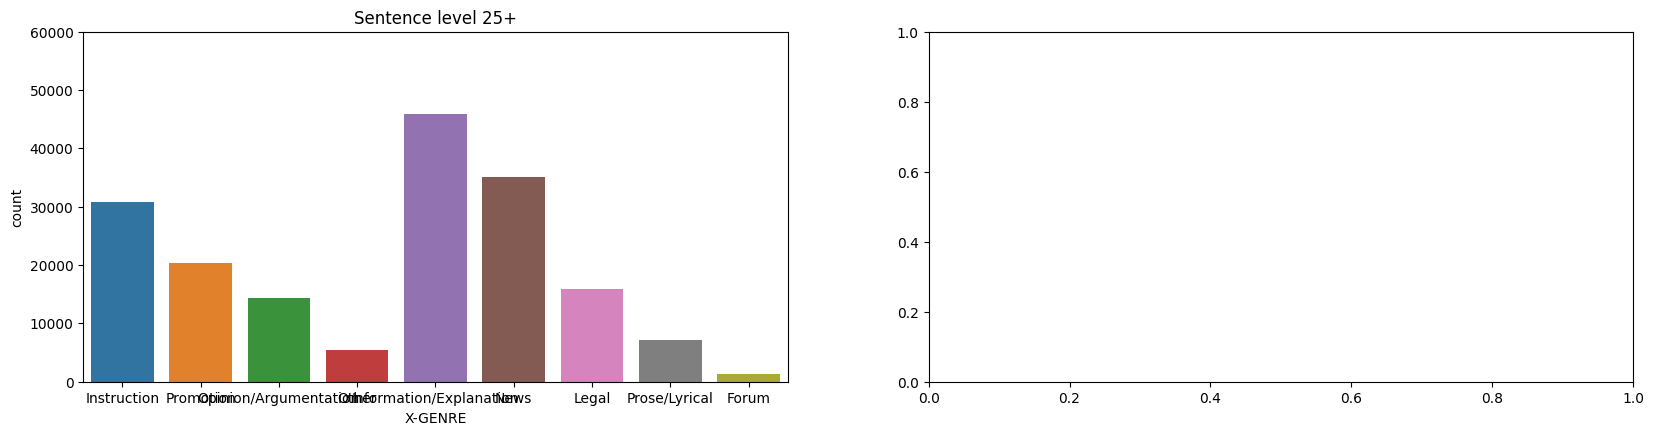

In [63]:
plt.figure(figsize=(20,10))
labels = data['X-GENRE'].unique().tolist()
#make 2 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=25], order=labels)
plt.title("Sentence level 25+")
plt.ylim(0, 60000)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=25], order=labels)
plt.title("Doc level 25+")
# plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

In [39]:
data['{tgt_col}_count'] = data.groupby('en_doc')['en_{tgt_col}'].transform('count')

In [48]:
# plot average par_count by genre
plt.figure(figsize=(15,5))
grp = data.groupby("X-GENRE")['par_count'].mean()
for i in grp.index:
    sns.barplot(x=grp.index, y=grp.values)

plt.title("Average number of sentences per doc by genre")

KeyError: 'Column not found: par_count'

<Figure size 1500x500 with 0 Axes>

In [61]:
#compute en_length per par_count per genre

data['avg_en_sent_length'] = data['en_length'] / data['par_count']
data['avg_is_sent_length'] = data['is_length'] / data['par_count']

Text(0.5, 1.0, 'Average sentence length in Icelandic by genre')

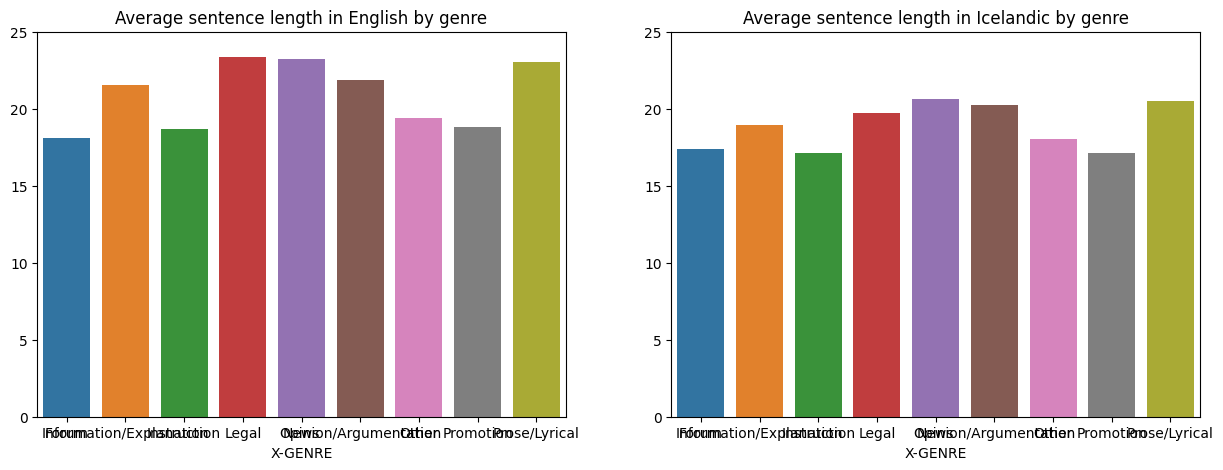

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
grp = data.groupby("X-GENRE")['avg_en_sent_length'].mean()
for i in grp.index:
    sns.barplot(x=grp.index, y=grp.values)
plt.ylim(0,25)
plt.title("Average sentence length in English by genre")
plt.subplot(1,2,2)
grp = data.groupby("X-GENRE")['avg_is_sent_length'].mean()
for i in grp.index:
    sns.barplot(x=grp.index, y=grp.values)
plt.ylim(0,25)
plt.title("Average sentence length in Icelandic by genre")


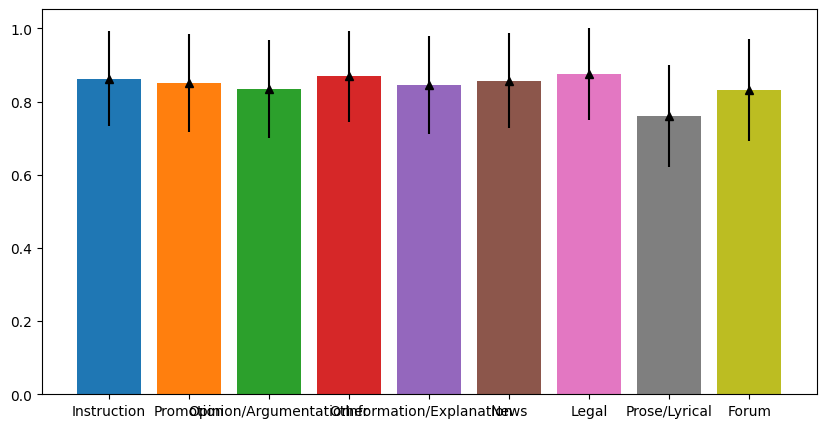

In [73]:
# plot average bi-cleaner score per genre
labels = data['X-GENRE'].unique().tolist()
plt.figure(figsize=(10, 5))
for label in labels:
    plt.bar(label,data[data['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, data[data['X-GENRE']==label]['score_bicleaner_ai'].mean(), data[data['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')

# Making train/dev/test splits

In [166]:

data = pd.read_csv("data/Macocu-is-en-sent-doc-labelled.csv", sep="\t")  

In [135]:
def satisfy_all_genre_counts(target_cnt, curr_cnt, genres, data):
    """ Function to check if all genre counts are satisfied.
    Args:
        target_cnt (dict): target counts for each genre
        curr_cnt (dict): current counts for each genre
        genres (list): list of genres in a given domain
        data (pandas.DataFrame): data for a given domain

    Returns:
        bool: True if all genre counts are satisfied, False otherwise
    """

    for genre in genres:
        if curr_cnt[genre] + data[data['X-GENRE']== genre]['en_par'].sum() > target_cnt[genre]:
            return False
    return True

def update_genre_counts(curr_cnt, genres, data):
    """ Function to update genre counts.
    Args:
        curr_cnt (dict): current counts for each genre
        genres (list): list of genres in a given domain
        data (pandas.DataFrame): data for a given domain
    
    Returns:
        curr_cnt (dict): updated counts for each genre
    """
    for genre in genres:
        curr_cnt[genre] += data[data['X-GENRE'] == genre]['en_par'].sum()
    return curr_cnt

def check_non_zero(test_cnt, dev_cnt):
    """ Function to check if the target counts are non-zero.
    Args:
        test_target_cnt (dict): target counts for test set
        dev_target_cnt (dict): target counts for dev set
    """
    for genre in test_cnt:
        if test_cnt[genre] == 0:
            raise ValueError("Test count for genre {} is 0".format(genre))
    for genre in dev_cnt:
        if dev_cnt[genre] == 0:
            raise ValueError("Dev  count for genre {} is 0".format(genre))

def split_data(data, test_prop= 0.1, dev_prop = 0.1, test_size = 0, dev_size = 0):
    """
    Split data into train, dev, and test sets. All splits have the same distribution of genres. 
    Internet domains of the data don't overlap bw splits.

    Args:
        data (pandas.DataFrame): data to split
        test_prop (float): proportion of data to put in test set. Default is 0.1
        dev_prop (float): proportion of data to put in dev set. Default is 0.1
        test_size (int): number of sentences to add to the test set. Default is 0. If it is greater than 0, 
            then the test_no is used instead of test_prop to determine the size of the test set.
        dev_size (int): number of sentences to add to the dev set. Default is 0. If it is greater than 0, 
            then the dev_no is used instead of dev_prop to determine the size of the dev set.
    
    Returns:
        train (pandas.DataFrame): train set
        dev (pandas.DataFrame): dev set
        test (pandas.DataFrame): test set
    """

    dom_genre = data.groupby(['en_domain','X-GENRE'])['en_par'].count().reset_index()
    labels = list(dom_genre['X-GENRE'].unique())
    ratios = {label : dom_genre[dom_genre['X-GENRE']==label]['en_par'].sum()/dom_genre['en_par'].sum() for label in labels}
    total = dom_genre['en_par'].sum()
    if test_size != 0:
        test_prop = test_size/total
    if dev_size != 0:
        dev_prop = dev_size/total
    test_target_cnt = {label: int(ratios[label] * total * test_prop) for label in ratios}
    dev_target_cnt = {label: int(ratios[label] * total * dev_prop) for label in ratios}
    test_curr_cnt = {label: 0 for label in ratios}
    dev_curr_cnt = {label: 0 for label in ratios}
    test_domains = []
    dev_domains = []
    train_domains = []

    for domain in dom_genre['en_domain'].unique():
        # print(domain)
        genres = list(dom_genre[dom_genre['en_domain']==domain]['X-GENRE'])
        if satisfy_all_genre_counts(test_target_cnt, test_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain]):
            test_curr_cnt = update_genre_counts(test_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain])
            test_domains.append(domain)
        elif satisfy_all_genre_counts(dev_target_cnt, dev_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain]):
            dev_curr_cnt = update_genre_counts(dev_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain])
            dev_domains.append(domain)
        else:
            train_domains.append(domain)
    
    check_non_zero(test_curr_cnt, dev_curr_cnt)

    test = data[data['en_domain'].isin(test_domains)]
    dev = data[data['en_domain'].isin(dev_domains)]
    train = data[data['en_domain'].isin(train_domains)]

    return train, dev, test

In [136]:
train, dev, test = split_data(data,test_size=5000, dev_size=5000)

# Analyze the datasets 

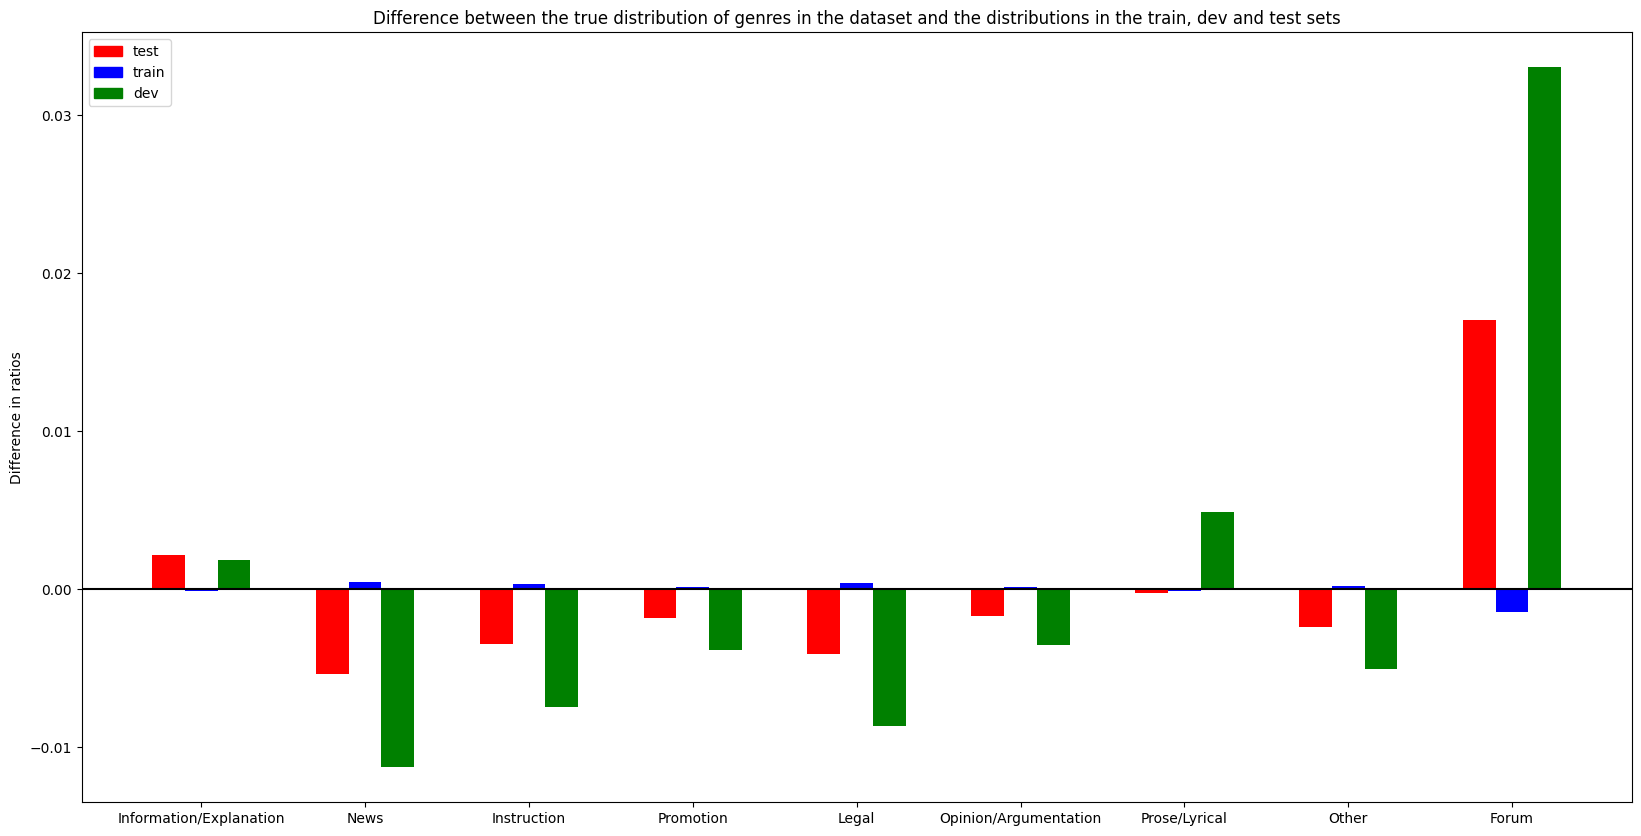

In [142]:
# group by genres the ratios and plot them as bar plots 
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='test')
blue_patch = mpatches.Patch(color='blue', label='train')
green_patch = mpatches.Patch(color='green', label='dev')

plt.figure(figsize=(20,10))
width = 0.2

ratios = data['X-GENRE'].value_counts()/data.shape[0]
test_ratios = ratios - test['X-GENRE'].value_counts()/test.shape[0]
dev_ratios = ratios - dev['X-GENRE'].value_counts()/dev.shape[0]
train_ratios = ratios - train['X-GENRE'].value_counts()/train.shape[0]

x = np.arange(len(train_ratios.keys()))
i = 0
for genre in test_ratios.keys():
    plt.bar(x[i]-0.2, test_ratios[genre], width = width, color = 'red', label='test')
    plt.bar(x[i], train_ratios[genre], label='train', width = width, color = 'blue')
    plt.bar(x[i]+0.2, dev_ratios[genre], label='dev', width = width, color = 'green')
    x += 1
plt.xticks(np.arange(len(train_ratios.keys())), train_ratios.keys())
# add horizontal line at 0 
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel('Difference in ratios')
plt.title('Difference between the true distribution of genres in the dataset and the distributions in the train, dev and test sets')
plt.legend(handles=[red_patch, blue_patch, green_patch])


Text(0.5, 1.0, 'Dev Data')

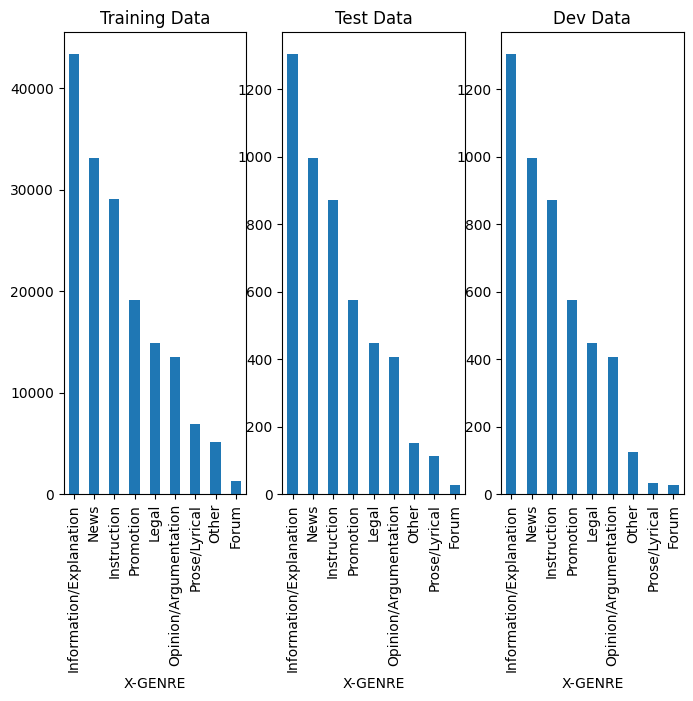

In [144]:
# check the distribution of genres in the training data
fig = plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
train['X-GENRE'].value_counts().plot(kind='bar')
plt.title('Training Data')
plt.subplot(1,3,2)
test['X-GENRE'].value_counts().plot(kind='bar')
plt.title('Test Data')
plt.subplot(1,3,3)
dev['X-GENRE'].value_counts().plot(kind='bar')
plt.title('Dev Data')

Text(0.5, 1.0, 'Test data')

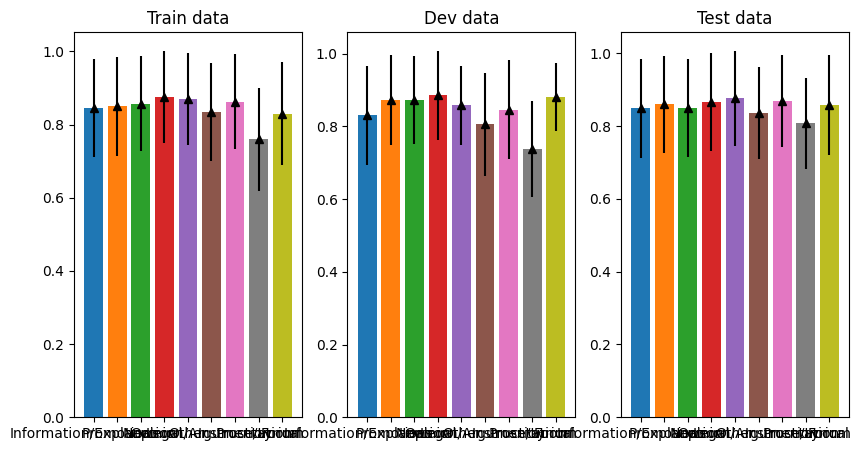

In [148]:
plt.figure(figsize=(10, 5))
labels = train['X-GENRE'].unique().tolist()
plt.subplot(1, 3, 1)
for label in labels:
    plt.bar(label,train[train['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, train[train['X-GENRE']==label]['score_bicleaner_ai'].mean(), train[train['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')
plt.title('Train data')
plt.subplot(1, 3, 2)
for label in labels:
    plt.bar(label,dev[dev['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, dev[dev['X-GENRE']==label]['score_bicleaner_ai'].mean(), dev[dev['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')
plt.title('Dev data')
plt.subplot(1, 3, 3)
for label in labels:
    plt.bar(label,test[test['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, test[test['X-GENRE']==label]['score_bicleaner_ai'].mean(), test[test['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')
plt.title('Test data')


In [146]:
# Check translation direction distribution
display(train.translation_direction.value_counts()/train.shape[0])
display(dev.translation_direction.value_counts()/dev.shape[0])
display(test.translation_direction.value_counts()/test.shape[0])

translation_direction
first-orig-second-ht    0.511522
second-orig-first-ht    0.217238
first-orig-second-mt    0.137632
second-orig-first-mt    0.133608
Name: count, dtype: float64

translation_direction
first-orig-second-ht    0.512002
second-orig-first-ht    0.238990
second-orig-first-mt    0.126278
first-orig-second-mt    0.122730
Name: count, dtype: float64

translation_direction
first-orig-second-ht    0.523994
second-orig-first-ht    0.209108
first-orig-second-mt    0.140290
second-orig-first-mt    0.126608
Name: count, dtype: float64

In [84]:
set(test.en_domain.unique()).intersection(set(train.en_domain.unique())).intersection(set(dev.en_domain.unique()))

set()

In [167]:
data['X-GENRE'].unique()

array(['Instruction', 'Promotion', 'Opinion/Argumentation', 'Other',
       'Information/Explanation', 'News', 'Legal', 'Prose/Lyrical',
       'Forum'], dtype=object)

In [14]:
def save_datasets(train, dev, test, tgt_lang, tgt_col, path, name):
    """
    Saves the datasets to tsv files with and without genre tokens, also saves complete dataframe where all 
    datasets are merged and 'set' column shows the set of each row.

    Args:
        train (pd.DataFrame): train dataset
        dev (pd.DataFrame): dev dataset
        test (pd.DataFrame): test dataset
        tgt_lang (str): target language
        path (str): path to save the files
        name (str): name of the files

    """
    # save all columns to tsv if it doesn't exist 
    if not os.path.exists(path + name + '_complete.tsv'):
        # merge columns add test, dev or train to new column 'set'
        train['set'] = ['train'] * train.shape[0]
        dev['set'] = ['dev'] * dev.shape[0]
        test['set'] = ['test'] * test.shape[0]
        # merge all datasets
        df = pd.concat([train, dev, test])
        df.to_csv(path + name + '_complete.tsv', sep='\t', index=False)
    # save only en_par and is_par columns to csv

    train[[f'en_{tgt_col}', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.train.tsv', sep='\t', index=False, header=False)
    dev[[f'en_{tgt_col}', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.dev.tsv', sep='\t', index=False, header=False)
    test[[f'en_{tgt_col}', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.test.tsv', sep='\t', index=False, header=False)
    
    # add token in from of en_par according to mapping
    genre_tokens = {'Prose/Lyrical': '>>lit<<','Instruction': '>>instr<<', 'Promotion': '>>promo<<', 'Opinion/Argumentation': '>>arg<<' , 'Other': '>>other<<' , 'Information/Explanation': '>>info<<', 'News': '>>news<<', 'Legal': '>>law<<', 'Forum': 
                    '>>forum<<'}

    # make column "tokens" with genre tokens 
    train['tokens'] = train['X-GENRE'].replace(genre_tokens)
    dev['tokens'] = dev['X-GENRE'].replace(genre_tokens)
    test['tokens'] = test['X-GENRE'].replace(genre_tokens)

    # merge genre tokens with en_par in new column en_par_tokens as string
    train[f'en_{tgt_col}_tokens'] = train['tokens'] + ' ' + train[f'en_{tgt_col}']
    dev[f'en_{tgt_col}_tokens'] = dev['tokens'] + ' ' + dev[f'en_{tgt_col}']
    test[f'en_{tgt_col}_tokens'] = test['tokens'] + ' ' + test[f'en_{tgt_col}']


    # save en_par and tgt_lang_par with genre tokens

    train[[f'en_{tgt_col}_tokens', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.train.tag.tsv', sep='\t', index=False, header=False)
    dev[[f'en_{tgt_col}_tokens', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.dev.tag.tsv', sep='\t', index=False, header=False)
    test[[f'en_{tgt_col}_tokens', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.test.tag.tsv', sep='\t', index=False, header=False)

    print('Saved datasets to ' + path + name + '.tsv and ' + path + name + '.tag.tsv and ' + path + name + '_complete.tsv')



In [17]:
import os
save_datasets(train, dev, test, "is", "doc", "data/en-is/", "MaCoCu.en-is")

KeyError: "None of [Index(['en_doc', 'is_doc'], dtype='object')] are in the [columns]"

In [1]:
import pandas as pd

dat = pd.read_csv("data/en-is/MaCoCu.en-is_complete.tsv", sep="\t", header=0)


In [13]:
# only keep en_par, is_par, set and X-GENRE columns
dat = dat[['en_par', 'is_par', 'set', 'X-GENRE']]
s = dat.groupby(['set', 'X-GENRE'])['en_par'].count().groupby('set').min().to_dict()
# get the min number per set
s

{'dev': 27, 'test': 26, 'train': 1262}

In [14]:
dat.groupby(['set', 'X-GENRE'])['en_par'].count()

set    X-GENRE                
dev    Forum                         27
       Information/Explanation     1304
       Instruction                  873
       Legal                        449
       News                         996
       Opinion/Argumentation        406
       Other                        125
       Promotion                    577
       Prose/Lyrical                 34
test   Forum                         26
       Information/Explanation     1304
       Instruction                  873
       Legal                        449
       News                         996
       Opinion/Argumentation        406
       Other                        153
       Promotion                    577
       Prose/Lyrical                113
train  Forum                       1262
       Information/Explanation    43363
       Instruction                29050
       Legal                      14933
       News                       33117
       Opinion/Argumentation      13497
       Ot

# Scratch

In [4]:
import pandas as pd
flores_dev = pd.read_csv("data/en-is/flores_dev.en-is.tsv", sep="\t", header=None)
flores_devtest = pd.read_csv("data/en-is/flores_devtest.en-is.tsv", sep="\t", header=None)


In [7]:
flores_devtest.columns

Index([0, 1], dtype='int64')

In [13]:
flores_dev['en_length'] = flores_dev[0].apply(lambda x: len(x.split()))
flores_devtest['en_length'] = flores_devtest[0].apply(lambda x: len(x.split()))

In [18]:
flores_dev[flores_dev['en_length']>=25].shape

(259, 4)

In [161]:
from prettytable import PrettyTable
import pandas as pd
import argparse

parser = argparse.ArgumentParser(description='Args to summarize evaluation scores.')
parser.add_argument('--folder', type=str, help='the folder where the evaluation files are stored')
parser.add_argument('--fname', type=str, help='the name of the file with predictions')
parser.add_argument('--ref_with_tags', type=str, help='the path to the reference file with tags (to determine the genres)')

def read_scores(folder, fname, ref_with_tags):
    ''' Reads the scores from the evaluation files and returns a dataframe with the scores and the genres. 
    
    Args:
    - folder (str): the folder where the evaluation files are stored
    - fname (str): the name of the file with predictions
    - ref_with_tags (str): the path to the reference file with tags (to determine the genres)
    
    Returns:
    - res (pandas DataFrame): a dataframe with the scores and the genres'''


    ref_with_tags = pd.read_csv(ref_with_tags, sep='\t', header=0)
    tokens_to_genres = {'>>info<<': 'Information/Explanation', '>>promo<<': 'Promotion', '>>news<<': 'News', '>>law<<': 'Legal', '>>other<<': 'Other', '>>arg<<': 'Opinion/Argumentation', '>>instr<<': 'Instruction', '>>lit<<': 'Prose/Lyrical', '>>forum<<': 'Forum'}
    genres = [tokens_to_genres[line.split(' ')[0]] for line in ref_with_tags.en_par_tokens.to_list()]
    
    bleu = float(open(folder + fname + "_predictions.txt.eval.bleu", "r").readlines()[0].strip('\n'))
    ter = float(open(folder + fname + "_predictions.txt.eval.ter", "r").readlines()[0].strip('\n'))
    chrf = float(open(folder + fname + "_predictions.txt.eval.chrf", "r").readlines()[0].strip('\n'))
    chrfpp = float(open(folder + fname + "_predictions.txt.eval.chrfpp", "r").readlines()[0].strip('\n'))
    bleurt = [float(l) for l in open(folder + fname + "_predictions.txt.eval.bleurt", "r").readlines()]
    # 2,4,6 precison, recall, f1
    bert_score = open(folder + fname + '_predictions.txt.eval.bertscore', 'r').readlines()[0].strip('\n').split(' ')
    comet = [float(l.split(" ")[-1].strip()) for l in open(folder + fname + "_predictions.txt.eval.comet", "r").readlines()]

    res = pd.DataFrame()
    res['genre'] = genres
    res['bert_score_f1'] = [float(bert_score[6])] * len(genres)
    res['bert_score_p'] = [float(bert_score[2])] * len(genres)
    res['bert_score_r'] = [float(bert_score[4])] * len(genres)
    res['bleu'] = [bleu] * len(genres)
    res['ter'] = [ter] * len(genres)
    res['chrf'] = [chrf] * len(genres)
    res['chrfpp'] = [chrfpp] * len(genres)
    res['comet_avg'] = [comet[-1]] * len(genres)
    res['comet'] = comet[:-1]
    res['bleurt'] = bleurt

    return res


args = parser.parse_args()

res = read_scores(args.folder, args.fname, args.ref_with_tags)

x = PrettyTable()
x.field_names = ["Test file", "BLEU", "COMET", "TER", "chrF", "chrFpp", "BertScore_f1", "BertScore_precision", "BertScore_recall"]
row = [args.name, round(res['bleu'].iloc[0],3), round(res['comet_avg'].iloc[0],3), round(res['ter'].iloc[0],3), round(res['chrf'].iloc[0],3), round(res['chrfpp'].iloc[0],3), round(res['bert_score_f1'].iloc[0],3), round(res['bert_score_p'].iloc[0],3), round(res['bert_score_r'].iloc[0],3)]
x.add_row(row)

y = PrettyTable()
y.add_column("Genre", list(res.groupby('genre').groups.keys()))
y.add_column('BLEURT', [round(s,3) for s in res.groupby('genre').mean()['bleurt'].to_list()])
y.add_column('COMET', [round(s,3) for s in res.groupby('genre').mean()['comet'].to_list()])
y.add_column('Count', [round(s,3) for s in res.groupby('genre').count()['bleurt'].to_list()])


with open(args.folder + args.fname + '_summary.txt', 'w') as w:
    w.write(str(x))
    w.write("\n\n")
    w.write(str(y.get_string(sortby="Count", reversesort=True)))



In [166]:
print(x)

+----------------+------+-------+------+------+--------+--------------+---------------------+------------------+
|   Test file    | BLEU | COMET | TER  | chrF | chrFpp | BertScore_f1 | BertScore_precision | BertScore_recall |
+----------------+------+-------+------+------+--------+--------------+---------------------+------------------+
| flores_devtest | 18.3 |  0.76 | 73.3 | 48.6 |  45.4  |    0.919     |        0.919        |      0.919       |
+----------------+------+-------+------+------+--------+--------------+---------------------+------------------+


In [162]:
print(y.get_string(sortby="Count", reversesort=True))

+-------------------------+--------+-------+-------+
|          Genre          | BLEURT | COMET | Count |
+-------------------------+--------+-------+-------+
| Information/Explanation |  0.62  | 0.753 |  512  |
|  Opinion/Argumentation  |  0.66  |  0.78 |  195  |
|          Legal          | 0.627  | 0.762 |  142  |
|       Instruction       | 0.593  | 0.739 |   76  |
|        Promotion        | 0.626  | 0.765 |   64  |
|           News          | 0.654  | 0.781 |   18  |
|          Other          | 0.776  | 0.797 |   3   |
|      Prose/Lyrical      | 0.598  | 0.807 |   2   |
+-------------------------+--------+-------+-------+


In [18]:
dat = pd.read_csv("data/en-is/MaCoCu.en-is_complete.tsv", sep="\t", header=0)

In [19]:
def doc_level_sets(data):
    """ Function to make doc level sets from sentence level sets. 
    Args:
        data (pandas.DataFrame): data to split
    
    Returns:
        train (pandas.DataFrame): train set
        dev (pandas.DataFrame): dev set
        test (pandas.DataFrame): test set
    """
    # make doc level sets
    train = data[data['set'] == 'train'].drop_duplicates(['en_doc'])
    dev = data[data['set'] == 'dev'].drop_duplicates(['en_doc'])
    test = data[data['set'] == 'test'].drop_duplicates(['en_doc'])
    return train, dev, test

In [21]:
import os
train, dev, test = doc_level_sets(dat)
save_datasets(train, dev, test, "is", "par", "data/en-is/", "MaCoCu.en-is")

Saved datasets to data/en-is/MaCoCu.en-is.tsv and data/en-is/MaCoCu.en-is.tag.tsv and data/en-is/MaCoCu.en-is_complete.tsv


In [4]:
import pandas as pd
dat = pd.read_csv("data/en-is/MaCoCu.en-is_complete.tsv", sep="\t", header=0)

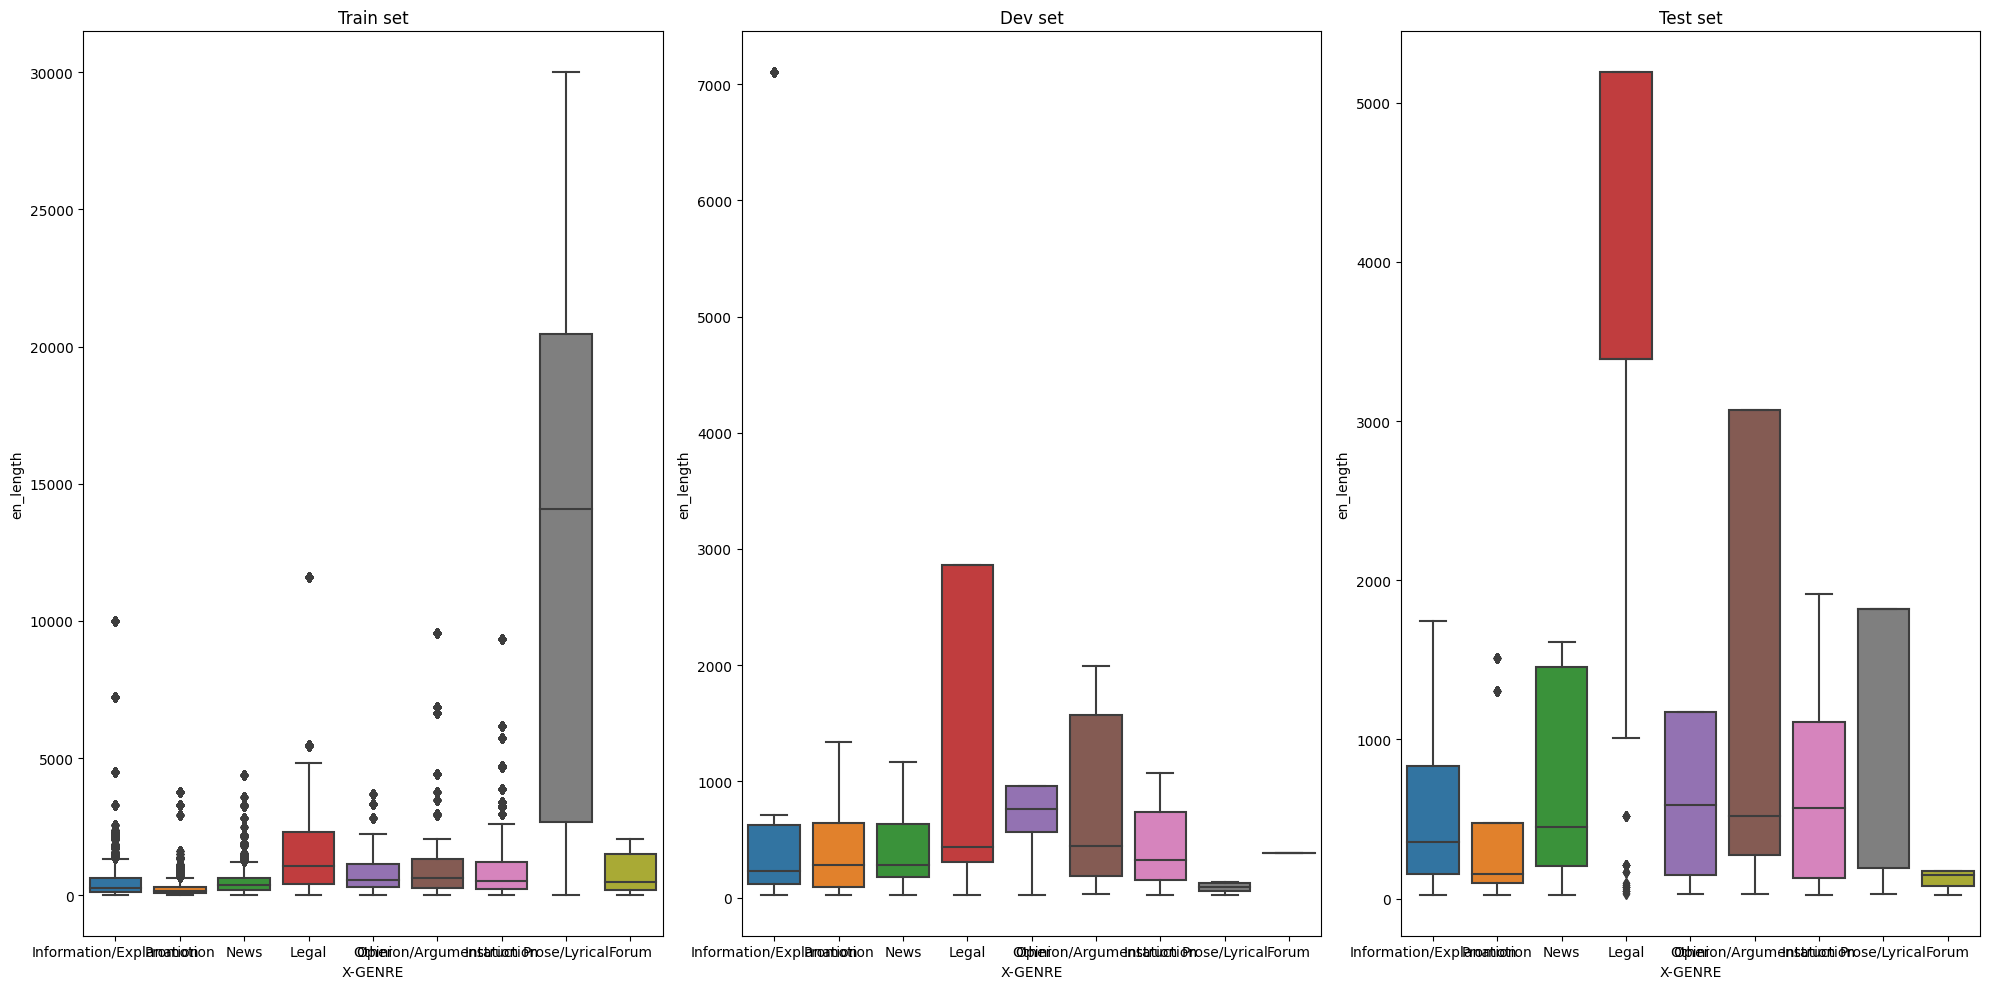

In [6]:
# plot en_length by genre by set
plt.figure(figsize=(20,10))
labels = dat['X-GENRE'].unique().tolist()
#make 3 plots in one figure
plt.subplot(1,3,1)
sns.boxplot(x="X-GENRE", y="en_length", data=dat[dat['set']=='train'], order=labels)
plt.title("Train set")
# plt.ylim(0, 1000)
plt.subplot(1,3,2)
sns.boxplot(x="X-GENRE", y="en_length", data=dat[dat['set']=='dev'], order=labels)
plt.title("Dev set")
# plt.ylim(0, 1000)
plt.subplot(1,3,3)
sns.boxplot(x="X-GENRE", y="en_length", data=dat[dat['set']=='test'], order=labels)
plt.title("Test set")
# plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

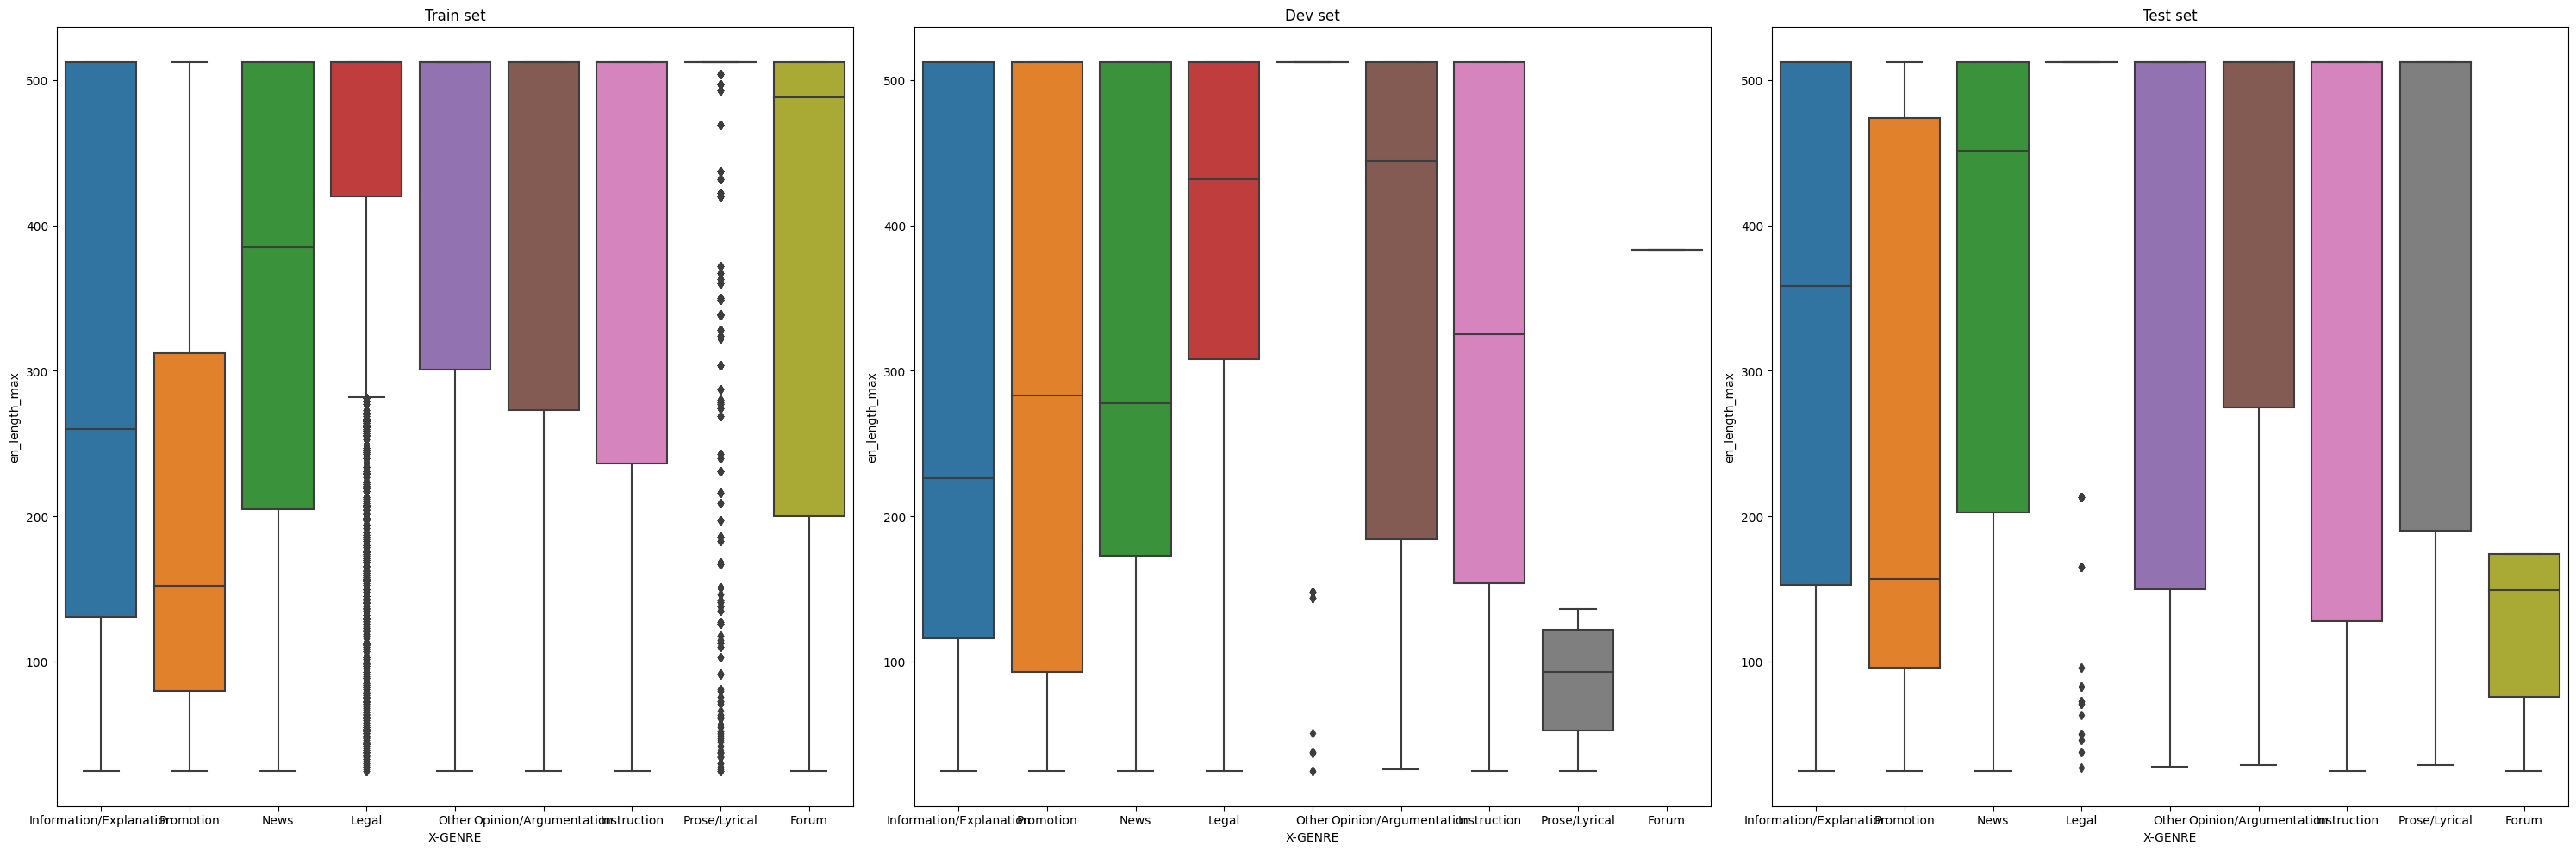

In [9]:
# where en_length > 512 en_length_max = 512, else en_length_max = en_length
dat['en_length_max'] = dat.apply(lambda x: 512 if x['en_length'] > 512 else x['en_length'], axis=1)

# plot en_length by genre by set
plt.figure(figsize=(30,10))
labels = dat['X-GENRE'].unique().tolist()
#make 3 plots in one figure
plt.subplot(1,3,1)
sns.boxplot(x="X-GENRE", y="en_length_max", data=dat[dat['set']=='train'], order=labels)
plt.title("Train set")
# plt.ylim(0, 1000)
plt.subplot(1,3,2)
sns.boxplot(x="X-GENRE", y="en_length_max", data=dat[dat['set']=='dev'], order=labels)
plt.title("Dev set")
# plt.ylim(0, 1000)
plt.subplot(1,3,3)
sns.boxplot(x="X-GENRE", y="en_length_max", data=dat[dat['set']=='test'], order=labels)
plt.title("Test set")
# plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

In [24]:
# number of X-genre per set
dat.groupby('set')['X-GENRE'].value_counts()

set    X-GENRE                
dev    Information/Explanation     1304
       News                         996
       Instruction                  873
       Promotion                    577
       Legal                        449
       Opinion/Argumentation        406
       Other                        125
       Prose/Lyrical                 34
       Forum                         27
test   Information/Explanation     1304
       News                         996
       Instruction                  873
       Promotion                    577
       Legal                        449
       Opinion/Argumentation        406
       Other                        153
       Prose/Lyrical                113
       Forum                         26
train  Information/Explanation    43363
       News                       33117
       Instruction                29050
       Promotion                  19182
       Legal                      14933
       Opinion/Argumentation      13497
       Pr

Training tokenizers

In [1]:
from transformers import AutoTokenizer, MarianTokenizer, AutoConfig
import sentencepiece as spm
import json

/home/malina/Projects/Master/envs/nmt/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tok = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-sla")

/home/malina/Projects/Master/envs/nmt/lib/python3.8/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [12]:
mar= MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-sla", clean_up_tokenization_spaces=False)

/home/malina/Projects/Master/envs/nmt/lib/python3.8/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [27]:
src=mar(['I hate tokenizers'], truncation=True)
tgt=mar(['Mrzim tokenizere'], truncation=True)

In [34]:
tgt_2 = mar(text_target=['Mrzim tokenizere'], truncation=True)

In [36]:
mar.decode(tgt_2['input_ids'][0])

'Mrzim tokenizere'

In [35]:
tgt_2

{'input_ids': [[33083, 6, 683, 143, 3139, 32, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}

In [29]:
tgt

{'input_ids': [[589, 670, 28, 34279, 6026, 88, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}

In [28]:
src

{'input_ids': [[13, 4102, 34279, 23557, 5, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1]]}

In [30]:
tgt_decoded = tok.decode(tgt['input_ids'][0])

In [31]:
tgt_decoded

'Mrzim▁tokenizere'

In [22]:
mar.decode([589, 670, 28, 34279, 6026, 88, 0], skip_special_tokens=True).strip()

'Mrzim▁tokenizere'

In [23]:
mar.convert_tokens_to_string(mar.convert_ids_to_tokens([589, 670, 28, 34279, 6026, 88, 0]))

'Mrzim▁tokenizere'

In [3]:
enc=tok.encode("Mrzim tokenizere")

In [4]:
tok.decode(enc)

'Mrzim▁tokenizere'

In [7]:
detok = tok.batch_decode([enc], skip_special_tokens=True, use_clean_up=True, clean_up_tokenization_spaces=True)
# detok = [d.strip().replace("▁", " ") for d in detok]


In [8]:
detok

['Mrzim▁tokenizere']

In [22]:
enc2= tokenizer.encode("Mrzim tokenizere")

In [23]:
tokenizer.decode(enc2)

'Mrzim▁tokenizere'

In [53]:
tok.vocab_files_names

{'source_spm': 'source.spm',
 'target_spm': 'target.spm',
 'vocab': 'vocab.json',
 'target_vocab_file': 'target_vocab.json',
 'tokenizer_config_file': 'tokenizer_config.json'}

In [9]:
for i in tok.encoder.keys():
    if tok.decoder[tok.encoder[i]] != i:
        print(i)

In [25]:
tok.decoder[70]

'м'

In [3]:
config = AutoConfig.from_pretrained("Helsinki-NLP/opus-mt-en-sla")

In [4]:
config

MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-en-sla",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      58878
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 58878,
  "decoder_vocab_size": 58879,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "extra_pos_embeddings": 58879,
  "forced_eos_token_id": 0,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "

In [5]:
def read_vocab_dict(filename):
    vocab = {}
    n=0
    with open (filename, 'r', encoding="utf-8") as f:
        for line in f:
            vocab[line.strip().split('\t')[0]] = n
            n += 1
    return vocab

In [6]:
def train_tokenizer(model_type):
    model_name = 'Helsinki-NLP/opus-mt-en-is'
    save_path = '../tokenizer'
    train_file = '../tokenizer/MaCoCu.en-is.dev.tag.tsv'
    tags = ['<info>', '<promo>', '<news>', '<law>', '<other>', '<arg>', '<instr>', '<lit>', '<forum>']
    # save_path = args.tokenizer_path if args.tokenizer_path else os.path.join(args.root_dir, "models", args.exp_type, args.model_type, "tokenizer")
    # if not os.path.exists(save_path):
    #     os.makedirs(save_path)
    old_tokenizer = AutoTokenizer.from_pretrained(model_name)
    # # print special tokens of old tokenizer
    # print("Special tokens: ", old_tokenizer.special_tokens_map)
    # #print old tokenizer special tokens ids
    # print("Special tokens ids: ", old_tokenizer.all_special_ids)
    # train src tokenizer
    spm.SentencePieceTrainer.train(input=train_file + '.src', model_prefix=save_path + '/' + model_type+ '_source', vocab_size=300, 
                                   pad_id=0, pad_piece = '<pad>',
                                   unk_id=1, unk_piece='<unk>',
                                   bos_id=2, bos_piece='<s>',  
                                   eos_id=3, eos_piece='</s>',
                                   user_defined_symbols=tags if 'genre_aware_token' in model_type else None,
                                   model_type='bpe')
    # train tgt tokenizer
    spm.SentencePieceTrainer.train(input=train_file + '.ref', model_prefix=save_path + '/' + model_type+ '_target', vocab_size=300,
                                   pad_id=0, pad_piece = '<pad>',
                                   unk_id=1, unk_piece='<unk>',
                                   bos_id=2, bos_piece='<s>',  
                                   eos_id=3, eos_piece='</s>',
                                   user_defined_symbols=tags if 'genre_aware_token' in model_type else None,
                                   model_type='bpe')
    # get vocab of src tokenizer
    src_vocab = read_vocab_dict(save_path + '/' + model_type+ '_source.vocab')
    # save as json
    with open(save_path + '/' + model_type+ '_source.vocab.json', 'w') as f:
        json.dump(src_vocab, f, ensure_ascii=False)
    # get vocab of tgt tokenizer
    tgt_vocab = read_vocab_dict(save_path + '/' + model_type+ '_target.vocab')
    # save as json
    with open(save_path + '/' + model_type+ '_target.vocab.json', 'w') as f:
        json.dump(tgt_vocab, f, ensure_ascii=False)
    # combine the vocabularies intercalating the tokens
    # combined = []
    # for i in range(len(src_vocab)):
    #     combined.append(src_vocab[i])
    #     combined.append(tgt_vocab[i])
    # # remove duplicates
    # combined = list(set(combined))
    # # remove pad token
    # combined.remove('<pad>')
    # combined = combined[:old_tokenizer.vocab_size-1]
    # # make a dict with token ids as values and tokens as keys
    # vocab = {}
    # for i in range(len(combined)):
    #     vocab[combined[i]] = i
    # vocab['<pad>'] = old_tokenizer.pad_token_id
    # # save the vocab
    # with open(save_path + '/' + model_type+ '_vocab.json', 'w', encoding='utf-8') as f:
    #     json.dump(vocab, f, ensure_ascii=False)

    # make tokenizer from pretrained using the new vocab and models
    tokenizer = MarianTokenizer(source_spm=save_path + '/' + model_type+ '_source.model', target_spm=save_path + '/' + model_type+ '_target.model', separate_vocabs=False, vocab=save_path + '/' + model_type+ '_source.vocab.json', target_vocab_file=save_path + '/' + model_type+ '_target.vocab.json')
    # save the tokenizer
    tokenizer.save_pretrained(save_path)
    print("Tokenizer saved at: ", save_path)
    print("Vocab size: ", tokenizer.vocab_size)
    print("Special tokens: ", tokenizer.special_tokens_map)
    return tokenizer

In [7]:
tokenizer = train_tokenizer("genre_aware_token")

Tokenizer saved at:  ../tokenizer
Vocab size:  300
Special tokens:  {'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}


/home/malina/Projects/Master/envs/nmt/lib/python3.8/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../tokenizer/MaCoCu.en-is.dev.tag.tsv.src
  input_format: 
  model_prefix: ../tokenizer/genre_aware_token_source
  model_type: BPE
  vocab_size: 300
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: <info>
  user_defined_symbols: <promo>
  user_defined_

In [31]:
eng = tokenizer(['I live in Iceland.'], padding=True, pad_to_multiple_of=16, truncation=True, max_length=16, return_tensors='pt')

In [32]:
ic = tokenizer(['Í ritröðinni Orðfræðirit fyrri alda er endurútgáfa nokkurra gamalla orðabóka sem hafa sérstöðu í íslenskri orðabókagerð.'], padding=True, pad_to_multiple_of=16, truncation=True, max_length=16, return_tensors='pt')

In [8]:
tokenizer.decoder

{0: '<pad>',
 1: '<unk>',
 2: '<s>',
 3: '</s>',
 4: '<info>',
 5: '<promo>',
 6: '<news>',
 7: '<law>',
 8: '<other>',
 9: '<arg>',
 10: '<instr>',
 11: '<lit>',
 12: '<forum>',
 13: '▁t',
 14: '▁a',
 15: 'in',
 16: 'he',
 17: 'on',
 18: 're',
 19: 'nd',
 20: '▁the',
 21: 'er',
 22: '▁o',
 23: 'ti',
 24: 'or',
 25: '▁s',
 26: '▁c',
 27: 'es',
 28: 'an',
 29: '▁w',
 30: 'en',
 31: 'is',
 32: '▁f',
 33: '▁in',
 34: '▁of',
 35: '▁p',
 36: 'ar',
 37: '▁b',
 38: 'ing',
 39: 'al',
 40: '▁and',
 41: 'it',
 42: 'ed',
 43: 'at',
 44: 'ou',
 45: '▁to',
 46: 'tion',
 47: 'ce',
 48: '▁m',
 49: 'la',
 50: '▁d',
 51: '▁I',
 52: 'ic',
 53: 'om',
 54: 'le',
 55: 'as',
 56: '▁h',
 57: '▁A',
 58: '▁re',
 59: 'ent',
 60: '▁e',
 61: '▁T',
 62: 'ri',
 63: '▁is',
 64: '▁B',
 65: 'st',
 66: 'ation',
 67: '▁for',
 68: 'il',
 69: '▁S',
 70: 'ur',
 71: 've',
 72: '▁n',
 73: '▁g',
 74: 'ol',
 75: '▁on',
 76: 'land',
 77: '▁be',
 78: 'lo',
 79: 'ers',
 80: '▁C',
 81: 'ro',
 82: '▁th',
 83: 'celand',
 84: '▁The',

In [60]:
tokenizer.encoder

{'<pad>': 0,
 '<unk>': 1,
 '<s>': 2,
 '</s>': 3,
 '<info>': 4,
 '<promo>': 5,
 '<news>': 6,
 '<law>': 7,
 '<other>': 8,
 '<arg>': 9,
 '<instr>': 10,
 '<lit>': 11,
 '<forum>': 12,
 '▁t': 13,
 '▁a': 14,
 'in': 15,
 'he': 16,
 'on': 17,
 're': 18,
 'nd': 19,
 '▁the': 20,
 'er': 21,
 '▁o': 22,
 'ti': 23,
 'or': 24,
 '▁s': 25,
 '▁c': 26,
 'es': 27,
 'an': 28,
 '▁w': 29,
 'en': 30,
 'is': 31,
 '▁f': 32,
 '▁in': 33,
 '▁of': 34,
 '▁p': 35,
 'ar': 36,
 '▁b': 37,
 'ing': 38,
 'al': 39,
 '▁and': 40,
 'it': 41,
 'ed': 42,
 'at': 43,
 'ou': 44,
 '▁to': 45,
 'tion': 46,
 'ce': 47,
 '▁m': 48,
 'la': 49,
 '▁d': 50,
 '▁I': 51,
 'ic': 52,
 'om': 53,
 'le': 54,
 'as': 55,
 '▁h': 56,
 '▁A': 57,
 '▁re': 58,
 'ent': 59,
 '▁e': 60,
 '▁T': 61,
 'ri': 62,
 '▁is': 63,
 '▁B': 64,
 'st': 65,
 'ation': 66,
 '▁for': 67,
 'il': 68,
 '▁S': 69,
 'ur': 70,
 've': 71,
 '▁n': 72,
 '▁g': 73,
 'ol': 74,
 '▁on': 75,
 'land': 76,
 '▁be': 77,
 'lo': 78,
 'ers': 79,
 '▁C': 80,
 'ro': 81,
 '▁th': 82,
 'celand': 83,
 '▁The': 84,

In [70]:
tokenizer.additional_special_tokens

[]

In [71]:
tokenizer.additional_special_tokens_ids

[]

In [72]:
tokenizer.special_tokens_map

{'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}

In [73]:
config

MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-en-sla",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      58878
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 58878,
  "decoder_vocab_size": 58879,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "extra_pos_embeddings": 58879,
  "forced_eos_token_id": 0,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "

In [74]:
def update_model_config(config, tokenizer, args):
    # update the config of the model to match the new tokenizer
    config._name_or_path = config._name_or_path + '/' + args.exp_type + '/' + args.model_type + '/' + 'new_tokenizer' if args.train_tokenizer else 'old_tokenizer'
    config.vocab_size = tokenizer.vocab_size
    config.pad_token_id = tokenizer.pad_token_id
    config.bos_token_id = tokenizer.bos_token_id
    config.eos_token_id = tokenizer.eos_token_id
    config.unk_token_id = tokenizer.unk_token_id
    config.decoder_start_token_id = tokenizer.pad_token_id
    config.decoder_vocab_size = tokenizer.vocab_size
    config.extra_pos_embeddings = tokenizer.vocab_size - config.decoder_start_token_id
    config.forced_eos_token_id = tokenizer.pad_token_id
    return config



In [75]:
new_config = update_model_config(config, tokenizer)

In [76]:
new_config

MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-en-sla",
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      58878
    ]
  ],
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 0,
  "decoder_vocab_size": 300,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 3,
  "extra_pos_embeddings": 300,
  "forced_eos_token_id": 0,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_length": 512,
  "max_posi

In [5]:
import pandas as pd

dat = pd.read_csv("../eval_bleu_scores.csv", sep=",", header=0)

In [6]:
# keep only the rows where the model name ends in _[1,2.3]
dat = dat[dat['model'].str.endswith('_1') | dat['model'].str.endswith('_2') | dat['model'].str.endswith('_3')]
# make a new column with the numbers in the model name
dat['seed'] = dat['model'].apply(lambda x: x.split('_')[-1])
# remove the numbers from the model name
# dat['model'] = dat['model'].apply(lambda x: '_'.join(x.split('_')[0:-1]))

In [7]:
#make test_file names columns and bleu scores the values
dat = dat.pivot(index='model', columns='test_file', values='bleu')

In [10]:
dat.to_csv("../eval_bleu_scores_pivot.csv", sep="\t", header=True, index=True)

In [37]:
# compute mean and std for each model for each test file
grouped=dat.groupby(['model', 'test_file']).agg({'bleu': ['mean', 'std']})
# round to 2 decimals and save as str mean +- std
grouped = grouped.round(3).astype(str)
grouped['bleu'] = grouped['bleu']['mean'] + ' +- ' + grouped['bleu']['std']
# drop the multiindex
grouped.columns = grouped.columns.droplevel(1)
# unstack the test_file index
grouped = grouped.unstack()
# remove the multiindex
grouped.columns = grouped.columns.droplevel(0)
# reset the index


In [40]:
grouped.to_csv("../eval_bleu_scores_mean_std.csv", sep="\t", header=True)

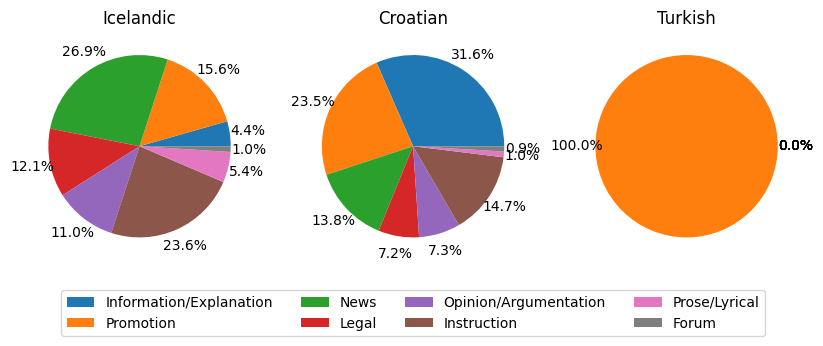

In [48]:
import matplotlib.pyplot as plt


is_counts = {"Information/Explanation": 5771, "Promotion": 20336, "News": 35109, "Legal": 15831, "Opinion/Argumentation": 14309, "Instruction": 30796, "Prose/Lyrical": 7072, "Forum":1315}
hr_counts = {"Information/Explanation": 402161, "Promotion": 299859, "News": 175627, "Legal": 91819, "Opinion/Argumentation": 93372, "Instruction": 187097, "Prose/Lyrical": 12937, "Forum":11774}
tr_counts = {"Information/Explanation": 303026, "Promotion": 347273, "News": 138134, "Legal": 73622, "Opinion/Argumentation": 23077, "Instruction": 234066, "Prose/Lyrical": 5436, "Forum":6835}
# make a pie char for is and hr

fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].pie(is_counts.values(), autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.2)
ax[0].set_title("Icelandic")
ax[1].pie(hr_counts.values(), autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.5)
ax[1].set_title("Croatian")
ax[2].pie(tr_counts.values(), autopct='%1.1f%%', pctdistance=1.2, labeldistance=1.2)
ax[2].set_title("Turkish")
# move legend below the pie chart
plt.legend(is_counts.keys(), loc="upper center", bbox_to_anchor=(-0.7, -0.1), ncols = 4)
plt.show()


In [8]:
# sum of icelandic counts
sum([hr_counts[genre] for genre in is_counts if genre != "Other"])

1274646